In [174]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
from scipy.optimize import curve_fit
import markdown
import sys
sys.path.append('/Users/vs/Dropbox/Python')
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u
import seaborn as sns
import os
import glob
import linecache
import gloess_fits as gf
import re
from IPython.display import Image
import itertools
import reddening_laws as red
from astropy.stats import sigma_clip
import scipy.optimize as op
import emcee
import corner
from matplotlib.ticker import MaxNLocator
from astroquery.irsa_dust import IrsaDust



bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
mp.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [175]:
path = '/Users/vs/Dropbox/Gaia/'
os.chdir(path)
#all_files = glob.glob(os.path.join(path, "TgasSource*.csv"))
#gaia_df = pd.concat(pd.read_csv(f) for f in all_files)
#gaia_df = gaia_df.reset_index(drop=True)

In [3]:
gaia_df = pd.read_csv('vizer_crossmatch.tsv', skiprows=166, skipinitialspace=True, names=('input', 'rad', 'HIP', 'TYC2', 'SolID', 'Source', 'RandomI', 'Epoch', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor', 'NAL', 'NAC', 'NgAL', 'NgAC', 'NbAL', 'NbAC', 'DQ', 'epsi', 'sepsi', 'APF', 'ARF', 'WAL', 'WAC', 'Apr', 'MatchObs', 'Dup', 'sK1', 'sK2', 'sK3', 'sK4', 'mK1', 'mK2', 'mK3', 'mK4', 'o_<Gmag>', '<FG>', 'e_<FG>', '<Gmag>', 'Var', 'GLON', 'GLAT', 'ELON', 'ELAT'), na_values='NOT_AVAILABLE', sep=';', comment='#')
gaia_df['ID'] = gaia_df.input.str.split('\t',0).str.get(0)

gaia_df = gaia_df.drop('input', 1)
#gaia_df = gaia_df.drop('rad', 1)
gaia_df = gaia_df.replace('', np.nan)
gaia_df['ID'] = gaia_df['ID'].replace(regex=True, to_replace=r' ',value='_')
gaia_df['id_compare'] = map(str.lower, gaia_df.ID)
gaia_df['id_compare'] = gaia_df['id_compare'].replace(regex=True, to_replace=r'_',value='')

gaia_df column descriptions:
----
*   rad --- distance from input position
*	HIP	(I6)	? Hipparcos identifier (\original{hip}) [NULL integer written as an empty string]	[ucd=meta.id.cross]
*	TYC2	(A12)	Tycho 2 identifier (\original{tycho2_id})	[ucd=meta.id.cross]
*	SolID	(I19)	Solution ID (solution_id) (G1)	[ucd=meta.id;meta.version]
*	Source	(I19)	Source ID (source_id) (G2)	[ucd=meta.id;meta.main]
*	RandomI	(I7)	Random index used to select subsets (random_index) (G3)	[ucd=meta.code]
*	Epoch	(F6.1)	[2015.0] Reference epoch in Julian years (ref_epoch) (G4)	[ucd=meta.ref;time.epoch]
*	RA_ICRS	(F14.10)	Right ascension (ICRS) at epoch 2015.0 (ra)	[ucd=pos.eq.ra;meta.main]
*	e_RA_ICRS	(F6.3)	Standard error of right ascension (\original{ra_error})	[ucd=stat.error;pos.eq.ra]
*	DE_ICRS	(F14.10)	Declination (ICRS) at epoch 2015.0 (\original{dec})	[ucd=pos.eq.dec;meta.main]
*	e_DE_ICRS	(F6.3)	Standard error of declination (\original{dec_error})	[ucd=stat.error;pos.eq.dec]
*	Plx	(F6.2)	Absolute barycentric stellar parallax of the source at the reference epoch Epoch (\original{parallax})	[ucd=pos.parallax]
*	e_Plx	(F5.2)	Standard error of parallax (\original{parallax_error})	[ucd=stat.error;pos.parallax]
*	pmRA	(F9.3)	Proper motion in right ascension direction (pmRA) (G5)	[ucd=pos.pm;pos.eq.ra]
*	e_pmRA	(F6.3)	Standard error of proper motion in right ascension direction (\original{pmra_error})	[ucd=stat.error;pos.pm;pos.eq.ra]
*	pmDE	(F9.3)	Proper motion in declination direction (pmdec) (G6)	[ucd=pos.pm;pos.eq.dec]
*	e_pmDE	(F6.3)	Standard error of proper motion in declination direction (\original{pmdec_error})	[ucd=stat.error;pos.pm;pos.eq.dec]
*	RADEcor	(F6.3)	Correlation between right ascension and declination (\original{ra_dec_corr})	[ucd=stat.correlation]
*	RAPlxcor	(F6.3)	Correlation between right ascension and parallax (\original{ra_parallax_corr})	[ucd=stat.correlation]
*	RApmRAcor	(F6.3)	Correlation between right ascension and proper motion in right ascension (\original{ra_pmra_corr})	[ucd=stat.correlation]
*	RApmDEcor	(F6.3)	Correlation between right ascension and proper motion in declination (\original{ra_pmdec_corr})	[ucd=stat.correlation]
*	DEPlxcor	(F6.3)	Correlation between declination and parallax (\original{dec_parallax_corr})	[ucd=stat.correlation]
*	DEpmRAcor	(F6.3)	Correlation between declination and proper motion in right ascension (\original{dec_pmra_corr})	[ucd=stat.correlation]
*	DEpmDEcor	(F6.3)	Correlation between declination and proper motion in declination (\original{dec_pmdec_corr})	[ucd=stat.correlation]
*	PlxpmRAcor	(F6.3)	Correlation between parallax and proper motion in right ascension (\original{parallax_pmra_corr})	[ucd=stat.correlation]
*	PlxpmDEcor	(F6.3)	Correlation between parallax and proper motion in declination (\original{parallax_pmdec_corr})	[ucd=stat.correlation]
*	pmRApmDEcor	(F6.3)	Correlation between proper motion in right ascension and proper motion in declination (\original{pmra_pmdec_corr})	[ucd=stat.correlation]
*	NAL	(I4)	Total number of observations AL (astrometric_n_obs_al) (G7)	[ucd=meta.number]
*	NAC	(I4)	Total number of observations AC (astrometric_n_obs_ac) (G8)	[ucd=meta.number]
*	NgAL	(I4)	Number of good observations AL (astrometric_n_good_obs_al) (G9)	[ucd=meta.number]
*	NgAC	(I4)	Number of good observations AC (astrometric_n_good_obs_ac) (G9)	[ucd=meta.number]
*	NbAL	(I2)	Number of bad observations AL (\original{astrometric_n_bad_obs_al}) (G10)	[ucd=meta.number]
*	NbAC	(I3)	Number of bad observations AC (\original{astrometric_n_bad_obs_ac}) (G10)	[ucd=meta.number]
*	DQ	(F8.2)	? Hipparcos/Gaia data discrepancy (Hipparcos subset of TGAS only) (\original{astrometric_delta_q}) (G11)	[ucd=stat.value]
*	epsi	(F5.2)	Excess noise of the source (\original{astrometric_excess_noise}) (G12)	[ucd=stat.value]
*	sepsi	(E8.1)	Significance of excess noise (\original{astrometric_excess_noise_sig}) (G13)	[ucd=stat.value]
*	APF	(I1)	[1] Primary or secondary (\original{astrometric_primary_flag}) (G14)	[ucd=meta.code]
*	ARF	(F6.2)	Relegation factor (\original{astrometric_relegation_factor})	[ucd=arith.factor]
*	WAL	(F7.3)	Mean astrometric weight of the source in the AL direction (\original{astrometric_weight_al})	[ucd=stat.weight;stat.mean]
*	WAC	(E9.2)	? Mean astrometric weight of the source in the AC direction (\original{astrometric_weight_ac})	[ucd=stat.weight;stat.mean]
*	Apr	(I1)	[3/5] Type of prior used in in the astrometric solution (\original{astrometric_priors_used}) (G15)	[ucd=meta.code]
*	MatchObs	(I3)	Amount of observations matched to this source (\original{matched_observations}) (G16)	[ucd=meta.number]
*	Dup	(I1)	[0/1] Source with duplicate sources (\original{duplicated_source}) (G17)	[ucd=meta.code]
*	sK1	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k1}) (G18)	[ucd=meta.code]
*	sK2	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k2}) (G18)	[ucd=meta.code]
*	sK3	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k3}) (G18)	[ucd=meta.code]
*	sK4	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k4}) (G18)	[ucd=meta.code]
*	mK1	(F13.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k1}) (G19)	[ucd=meta.code]
*	mK2	(F12.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k2}) (G19)	[ucd=meta.code]
*	mK3	(F12.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k3}) (G19)	[ucd=meta.code]
*	mK4	(F12.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k4}) (G19)	[ucd=meta.code]
*	o_<Gmag>	(I4)	Number of observations contributing to G photometry (\original{phot_g_n_obs})	[ucd=meta.number]
*	<FG>	(F15.5)	G-band mean flux (\original{phot_g_mean_flux})	[ucd=phot.flux;stat.mean;em.opt]
*	e_<FG>	(F13.5)	Error on G-band mean flux (\original{phot_g_mean_flux_error})	[ucd=stat.error]
*	<Gmag>	(F6.3)	G-band mean magnitude (\original{phot_g_mean_mag}) (G20)	[ucd=phot.mag;stat.mean;em.opt]
*	Var	(A13)	Photometric variability flag (\original{phot_variable_flag}) (G21)	[ucd=meta.code;src.var]
*	GLON	(F14.10)	Galactic longitude at epoch 2015.0 (l)	[ucd=pos.galactic.lon]
*	GLAT	(F14.10)	Galactic latitude at epoch 2015.0 (b)	[ucd=pos.galactic.lat]
*	ELON	(F14.10)	Ecliptic longitude at epoch 2015.0 (\original{ecl_lon})	[ucd=pos.ecliptic.lon]
*	ELAT	(F14.10)	Ecliptic latitude at epoch 2015.0 (\original{ecl_lat})	[ucd=pos.ecliptic.lat]
*   ID -- RR Lyrae name
*   id_compare -- lowercase id for string comparison

In [4]:
gaia_df

rad       HIP          TYC2                SolID               Source  \
0   0.0058   59411.0           NaN  1635378410781933568  1546016668386865792   
1   0.0095    6115.0           NaN  1635378410781933568  4692528057537147136   
2   0.0026   77830.0           NaN  1635378410781933568  1191509999055192960   
3   0.0042  107935.0           NaN  1635378410781933568  1793460110951463424   
4   0.0169  112994.0           NaN  1635378410781933568  2828497064068310784   
5   0.0080   56742.0           NaN  1635378410781933568  3972712532526824448   
6   0.0240   12199.0           NaN  1635378410781933568  4947090013255935616   
7   0.0036  102593.0           NaN  1635378410781933568  1760981190300823808   
8   0.0051   37779.0           NaN  1635378410781933568  3030561875047012352   
9   0.0454   93476.0           NaN  1635378410781933568  6662886601414152448   
10  1.7213       NaN  2452-1557-1   1635378410781933568   886793923513582464   
11  0.0004   35667.0           NaN  1635378410781933568   886793511196722432   
12  1.5914       NaN  2452-2070-1   1635378410781933568   886790590618961536   
13  0.0561   95497.0           NaN  1635378410781933568  2125982595039626368   
14  0.0256    5803.0           NaN  1635378410781933568   294072906063827072   
15  0.0089   79974.0           NaN  1635378410781933568  1317846462066886272   
16  0.0129   66122.0           NaN  1635378410781933568  1561928422706459264   
17  1.4310       NaN  5899-522-1    1635378410781933568  2981136490916347136   
18  0.0045   22442.0           NaN  1635378410781933568  2981136559635823744   
19  0.0531  111839.0           NaN  1635378410781933568  2211629018927324288   
20  0.8858       NaN  4273-435-1    1635378410781933568  2211629018927323904   
21  0.0052   75942.0           NaN  1635378410781933568  1374971554328855424   
22  0.0053   68188.0           NaN  1635378410781933568  1453674734083793152   
23  0.0227   56734.0           NaN  1635378410781933568  1058066258521694464   
24  0.0131   14856.0           NaN  1635378410781933568  5165689383172441216   
25  0.0100   61031.0           NaN  1635378410781933568  3499611302073156736   
26  0.0089    8163.0           NaN  1635378410781933568  5022411782439031936   
27  0.0051    1878.0           NaN  1635378410781933568  2857456207478683776   
28  0.0072   59946.0           NaN  1635378410781933568  1683444626742055168   
29  0.0171   65547.0           NaN  1635378410781933568  1565435486842373632   
30  0.0238   44428.0           NaN  1635378410781933568  1009665138191506432   
31  0.0224   56088.0           NaN  1635378410781933568  4022618712476736896   
32  0.0082   69759.0           NaN  1635378410781933568  1492230552420859776   
33  0.0016   87681.0           NaN  1635378410781933568  4596935588904631040   
34  1.7962       NaN  4939-19-1     1635378410781933568  3698723752532514816   
35  0.0109   59208.0           NaN  1635378410781933568  3698725333080479104   
36  0.0331   80990.0           NaN  1635378410781933568  5768557209320424320   
37  0.0117   68292.0           NaN  1635378410781933568  3727833391597367424   
38  0.0138   96101.0           NaN  1635378410781933568  6771307450164337920   
39  0.0132   80853.0           NaN  1635378410781933568  4467433013440949376   
40  1.9818       NaN  8422-616-1    1635378410781933568  6483680156140459904   
41  0.0283  104613.0           NaN  1635378410781933568  6483680327939151488   
42  0.0155   50289.0           NaN  1635378410781933568  5461994297841116160   
43  0.0221   96112.0           NaN  1635378410781933568  2142052885197472000   
44  0.0279   14601.0           NaN  1635378410781933568    15489404416044288   
45  0.0055  105285.0           NaN  1635378410781933568  6884361743993904768   

    RandomI   Epoch     RA_ICRS  e_RA_ICRS    DE_ICRS     ...      \
0   1004237  2015.0  182.810685      0.149  47.828763     ...       
1   1393825  2015.0   19.627973      0.265 -67.918161     ...       
2    619871  2015.0  238.379390      0.

In [5]:
info_df = pd.read_csv('rrl_average_mags', delim_whitespace=True)
info_df


Name  Period Type id_compare  mag_3p6  err_3p6  amp_3p6  mag_4p5  \
0     ABUma   0.600   ab      abuma    9.598    0.003    0.171    9.587   
1     AMTuc   0.406    c      amtuc   10.602    0.002    0.127   10.565   
2     ANSer   0.522   ab      anser    9.801    0.004    0.289    9.795   
3     APSer   0.341    c      apser   10.213    0.002    0.111   10.202   
4     AVPeg   0.390   ab      avpeg    9.332    0.004    0.281    9.329   
5     BHPeg   0.641   ab      bhpeg    9.002    0.003    0.237    8.982   
6     BXLeo   0.363    c      bxleo   10.678    0.002    0.107   10.670   
7     CSEri   0.311    c      cseri    8.126    0.002    0.117    8.110   
8     CUCom   0.406    d      cucom   12.258    0.002    0.142   12.229   
9     DHPeg   0.256    c      dhpeg    8.610    0.004    0.305    8.662   
10    DXDel   0.473   ab      dxdel    8.653    0.004    0.249    8.641   
11    HKPup   0.734   ab      hkpup    9.884    0.004    0.252    9.854   
12    MTTel   0.317    c      mttel    8.078    0.002    0.126    8.064   
13    RRCet   0.553   ab      rrcet    8.504    0.004    0.268    8.493   
14    RRGem   0.397   ab      rrgem   10.243    0.004    0.316   10.222   
15    RRLeo   0.452   ??      rrleo    9.661    0.004    0.304    9.632   
16    RRLyr   0.567   ab      rrlyr    6.472    0.003    0.218    6.463   
17    RUPsc   0.390    c      rupsc    9.085    0.002    0.116    9.072   
18    RuScl   0.493   ab      ruscl    9.174    0.004    0.313    9.157   
19    RvCrB   0.332    c      rvcrb   10.494    0.002    0.105   10.471   
20    RVUma   0.468   ab      rvuma    9.760    0.004    0.326    9.746   
21    RXEri   0.587   ab      rxeri    8.340    0.004    0.279    8.315   
22    RZCep   0.309    c      rzcep    7.871    0.002    0.119    7.858   
23    STBoo   0.622   ab      stboo    9.842    0.005    0.348    9.823   
24    STCVn   0.329    c      stcvn   10.439    0.002    0.120   10.414   
25    SUDra   0.660   ab      sudra    8.600    0.004    0.281    8.584   
26    SVEri   0.714   ab      sveri    8.568    0.003    0.209    8.551   
27    SVHya   0.479   ab      svhya    9.370    0.004    0.293    9.351   
28    SVScl   0.377    c      svscl   10.502    0.002    0.100   10.494   
29    SWAnd   0.442   ab      swand    8.489    0.004    0.279    8.475   
30    SWDra   0.570   ab      swdra    9.306    0.004    0.257    9.288   
31    SXUma   0.307    c      sxuma   10.077    0.002    0.107   10.066   
32    TTLyn   0.597   ab      ttlyn    8.587    0.003    0.221    8.574   
33    TUUma   0.558   ab      tuuma    8.623    0.004    0.293    8.609   
34    TVBoo   0.313    c      tvboo   10.198    0.002    0.133   10.181   
35    TWHer   0.400   ab      twher   10.239    0.004    0.304   10.213   
36     TSex   0.325    c       tsex    9.141    0.001    0.083    9.120   
37    UUVir   0.476   ab      uuvir    9.492    0.004    0.308    9.483   
38    UVOct   0.543   ab      uvoct    8.182    0.004    0.244    8.170   
39    UYBoo   0.651   ab      uyboo    9.725    0.003    0.227    9.700   
40    UYCam   0.267    c      uycam   10.776    0.001    0.062   10.759   
41    UYCyg   0.467   ab      uycyg    9.725    0.004    0.284    9.701   
42  V440Sgr   0.477   ab    v440sgr    9.040    0.004    0.322    9.023   
43  V675Sgr   0.642   ab    v675sgr    8.958    0.004    0.283    8.933   
44    VXHer   0.455   ab      vxher    9.601    0.005    0.332    9.580   
45     VInd   0.480   ab       vind    8.852    0.004    0.281    8.834   
46    WYAnt   0.574   ab      wyant    9.569    0.004    0.261    9.552   
47    XXAnd   0.723   ab      xxand    9.414    0.004    0.298    9.386   
48    XZCyg   0.467   ab      xzcyg    8.657    0.003    0.225    8.641   
49     XAri   0.651   ab       xari    7.888    0.004    0.289    7.862   
50    YZCap   0.273    c      yzcap   10.338    0.001    0.093   10.321   

    err_4p5  amp_4p5  
0     0.003    0.177  
1     0.002    0.142  
2     0.004    0.299  
3     0.002   

Didn't save the average mags, just the gloess input files, so doing some gloess fitting now

all_the_gloess() adapted from Cepheid galactic_multiwavelegth_cepheid notebook

Stripped out the parts that are only relavent to the olde time photographic cepheid references


In [6]:
def all_the_gloess(row):
    cepID, df, sm_params = gloess_setup(row['Name'])
    #print sm_params
    name = row.Name
    period = row.Period
    df['phase'] = (df['MJD'] / period) - np.floor(df['MJD'] / period)
    print name, period, sm_params
    bands = ['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', '3p6', '4p5', '5p8', '8p0']
    offsets= [3, 1.5, 1.2, 0.7, 0.2, 0, -0.4, -0.8, -1.4, -1.8, -2.2, -2.6]
    colors = ['Violet', 'MediumSlateBlue', 'DodgerBlue', 'Turquoise', 'LawnGreen', 'Gold', 'DarkOrange', 'Red', 'MediumVioletRed', 'DeepPink', 'HotPink', 'PeachPuff']
    av_mags = np.zeros(12) + np.nan   
    av_errs = np.zeros(12) + np.nan   
    av_amps = np.zeros(12) + np.nan   
    mp.close()
    mp.clf()
    max_cur = 0
    min_cur = 99
    fig = mp.figure(figsize=(10,10))
    ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.8])    
    titlestring = name + ', P = ' + str(np.round(period, decimals=4)) + ' days'
    mp.title(titlestring, fontsize=20)
    ax1.set_ylabel('Magnitude')
    ax1.set_xlabel('Phase $\phi$')

    for band in np.arange(len(bands)):
        mag = 'mag_' + str(bands[band])
        err = 'err_' + str(bands[band])
        amplitude = 'amp_' + str(bands[band])
            
        ### Removing data where mag=0 and error=9.99
        #if (df.loc[df[err]==9.99, mag] == 0):
        df.loc[df[mag]==0.00, mag] = np.nan        
        #df.loc[mag==0.00, err==9.99]
        
        ### Attempting dynamic smoothing parameters

        smooth = float(sm_params[band])
        
        pullmags = df[mag]
        n_good = len(pullmags < 50)
        #if (n_good <= 5):
        #    smooth = 1
        #elif (n_good >= 50):
        #    smooth = 0.1
        pullerrs = df[err]
        pullphase = df['phase']
        
        data1, x, y, yerr, xphase = gf.fit_one_band(df[mag], df[err], df['phase'],len(df[mag]) ,smooth)
        
        ave, adev, sdev, var, skew, kurtosis, amp = gf.moment(data1[200:300],100)
        #print ave, (sdev/(np.sqrt(len(data1)))), amp
        
        info_df.ix[info_df.Name==name, mag]=ave
        info_df.ix[info_df.Name==name, err]=sdev/(np.sqrt(len(data1)))
        info_df.ix[info_df.Name==name, amplitude]=amp
        av_mags[band] = ave
        av_errs[band] = sdev/(np.sqrt(len(data1)))
        av_amps[band] = amp
               
        plotmag = pullmags[pullmags<50]
        plotphase = pullphase[pullmags<50]

        plotmag = np.concatenate((plotmag,plotmag,plotmag,plotmag,plotmag))
        plotphase = np.concatenate((plotphase,(plotphase+1.0),(plotphase+2.0),(plotphase+3.0),(plotphase+4.0)))
        size_of_data = len(plotmag)
        
        if np.sign(offsets[band]) == -1: 
            offstring = ' - ' + str(abs(offsets[band]))
        elif np.sign(offsets[band]) == 0: 
            offstring = ''
        else:
            offstring = ' + ' + str(offsets[band])
        lab_text = str(bands[band]) + str(offstring)
        ax1.plot(x,data1+offsets[band],'k-', zorder=4)
        ax1.plot(plotphase, plotmag+offsets[band],color=colors[band],marker='o',ls='None', label=lab_text)
        maxval = np.max(data1[200:300]+offsets[band])
        minval = np.min(data1[200:300]+offsets[band])
        if(maxval > max_cur):
            max_cur = maxval
        if(minval < min_cur):
            min_cur = minval

        
    maxlim = max_cur + 1.5
    minlim = min_cur - 1.5
    ax1.axis([1,3.5,(maxlim),(minlim)])
    handles, labels = ax1.get_legend_handles_labels() 
    mp.legend(handles[::-1],labels[::-1], numpoints=1,prop={'size':10})
    mp.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    mp.savefig(cepID + '.pdf')
    bands_df = pd.DataFrame(bands)
    bands_df.columns = ['Band']
    av_mags_df = pd.DataFrame(av_mags)
    av_mags_df.columns = ['AverageMag']
    av_errs_df = pd.DataFrame(av_errs)
    av_errs_df.columns = ['AverageErr']
    av_amps_df = pd.DataFrame(av_amps)
    av_amps_df.columns = ['AverageAmp']


    cep_out_df = pd.concat([bands_df, av_mags_df, av_errs_df, av_amps_df], axis=1, ignore_index=True)
    print cep_out_df

In [7]:

def gloess_setup(star):
    mag_columns = []
    err_columns = []
    cols = ['MJD']
    bands = ['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', '3p6', '4p5', '5p8', '8p0']
    for wlen in np.arange(len(bands)):
        mag_name = ('mag_' + str(bands[wlen]))
        err_name = ('err_' + str(bands[wlen]))
        mag_columns.append(mag_name)
        err_columns.append(err_name)
        cols.append(mag_name)
        cols.append(err_name)
    
    cols.append('Reference')
    
    gloess_file = "/Users/vs/Dropbox/CRRP/RR_Lyrae_lightcurves/S19p2_reduction/" + star + '.gloess_in'
    
    linecache.clearcache()
    smooth_line = linecache.getline(gloess_file, 4).strip()
    smooth_line = re.sub("[\[\]\'\",]"," ", smooth_line)
    smooth = smooth_line.split()
    df = pd.read_csv(gloess_file, header=None, skiprows=4, names=(cols), comment='-', delim_whitespace=True)
    return(star, df, smooth)


In [8]:
## only run this if running from scratch

#spitzer_dir = "/Users/vs/Dropbox/CRRP/RR_Lyrae_lightcurves/S19p2_reduction"
#info_file = spitzer_dir + '/rrl_periods'
#info_df = pd.read_csv(info_file, delim_whitespace=True, header=None, names=['Name', 'Period', 'Type'])
#info_df['Name_Lower'] = map(str.lower, info_df.Name)


#av_cols = []
#bands = ['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', '3p6', '4p5', '5p8', '8p0']
#for wlen in np.arange(len(bands)):
#    mag_name = ('mag_' + str(bands[wlen]))
#    err_name = ('err_' + str(bands[wlen]))
#    amp_name = ('amp_' + str(bands[wlen]))
#    av_cols.append(mag_name)
#    av_cols.append(err_name)
#    av_cols.append(amp_name)
#av_cols

#for columns in np.arange(len(av_cols)):
#    info_df[av_cols[columns]] = np.nan


#info_df.apply(lambda line: all_the_gloess(line), axis=1)


#info_df = info_df.dropna(axis=1, how='all')

#info_df = info_df.rename(columns={'Name_Lower':'id_compare'})
#info_df.to_csv('rrl_average_mags', index=False, header=True, sep=' ', float_format='%4.3f', na_rep= 99.99)

Have some duplicates in the Gaia vizier table - want to get rid of these. Remove based on distance from input position.


In [90]:
printcols = ['ID', 'rad']
gaia_df[printcols]
gaia_df = gaia_df.groupby(['ID']).min()
#gaia_df = gaia_df.reset_index(drop=True)

KeyError: "['ID'] not in index"

In [91]:
merged_df = info_df.merge(gaia_df, on='id_compare')

In [92]:
## Useful to check that the matching worked
#printcols = ['Name', 'id_compare']
#merged_df[printcols]

In [93]:
merged_df.columns

Index([u'Name', u'Period', u'Type', u'id_compare', u'mag_3p6', u'err_3p6',
       u'amp_3p6', u'mag_4p5', u'err_4p5', u'amp_4p5', u'rad', u'HIP', u'TYC2',
       u'SolID', u'Source', u'RandomI', u'Epoch', u'RA_ICRS', u'e_RA_ICRS',
       u'DE_ICRS', u'e_DE_ICRS', u'Plx', u'e_Plx', u'pmRA', u'e_pmRA', u'pmDE',
       u'e_pmDE', u'RADEcor', u'RAPlxcor', u'RApmRAcor', u'RApmDEcor',
       u'DEPlxcor', u'DEpmRAcor', u'DEpmDEcor', u'PlxpmRAcor', u'PlxpmDEcor',
       u'pmRApmDEcor', u'NAL', u'NAC', u'NgAL', u'NgAC', u'NbAL', u'NbAC',
       u'DQ', u'epsi', u'sepsi', u'APF', u'ARF', u'WAL', u'WAC', u'Apr',
       u'MatchObs', u'Dup', u'sK1', u'sK2', u'sK3', u'sK4', u'mK1', u'mK2',
       u'mK3', u'mK4', u'o_<Gmag>', u'<FG>', u'e_<FG>', u'<Gmag>', u'Var',
       u'GLON', u'GLAT', u'ELON', u'ELAT'],
      dtype='object')

In [222]:
useful = ['Name', 'Period', 'Type', 'mag_3p6', 'err_3p6', 'amp_3p6', 'mag_4p5', 'err_4p5', 'amp_4p5', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx', 'id_compare']
analysis_df = merged_df[useful]

In [223]:
analysis_df

Name  Period Type  mag_3p6  err_3p6  amp_3p6  mag_4p5  err_4p5  \
0     ABUma   0.600   ab    9.598    0.003    0.171    9.587    0.003   
1     AMTuc   0.406    c   10.602    0.002    0.127   10.565    0.002   
2     ANSer   0.522   ab    9.801    0.004    0.289    9.795    0.004   
3     AVPeg   0.390   ab    9.332    0.004    0.281    9.329    0.004   
4     BHPeg   0.641   ab    9.002    0.003    0.237    8.982    0.003   
5     BXLeo   0.363    c   10.678    0.002    0.107   10.670    0.002   
6     CSEri   0.311    c    8.126    0.002    0.117    8.110    0.002   
7     DXDel   0.473   ab    8.653    0.004    0.249    8.641    0.004   
8     HKPup   0.734   ab    9.884    0.004    0.252    9.854    0.004   
9     MTTel   0.317    c    8.078    0.002    0.126    8.064    0.002   
10    RRGem   0.397   ab   10.243    0.004    0.316   10.222    0.004   
11    RRLyr   0.567   ab    6.472    0.003    0.218    6.463    0.003   
12    RUPsc   0.390    c    9.085    0.002    0.116    9.072    0.002   
13    RvCrB   0.332    c   10.494    0.002    0.105   10.471    0.002   
14    RVUma   0.468   ab    9.760    0.004    0.326    9.746    0.004   
15    RXEri   0.587   ab    8.340    0.004    0.279    8.315    0.004   
16    RZCep   0.309    c    7.871    0.002    0.119    7.858    0.002   
17    STBoo   0.622   ab    9.842    0.005    0.348    9.823    0.005   
18    STCVn   0.329    c   10.439    0.002    0.120   10.414    0.002   
19    SUDra   0.660   ab    8.600    0.004    0.281    8.584    0.004   
20    SVEri   0.714   ab    8.568    0.003    0.209    8.551    0.003   
21    SVHya   0.479   ab    9.370    0.004    0.293    9.351    0.004   
22    SVScl   0.377    c   10.502    0.002    0.100   10.494    0.002   
23    SWAnd   0.442   ab    8.489    0.004    0.279    8.475    0.004   
24    SWDra   0.570   ab    9.306    0.004    0.257    9.288    0.004   
25    SXUma   0.307    c   10.077    0.002    0.107   10.066    0.002   
26    TTLyn   0.597   ab    8.587    0.003    0.221    8.574    0.003   
27    TUUma   0.558   ab    8.623    0.004    0.293    8.609    0.004   
28    TVBoo   0.313    c   10.198    0.002    0.133   10.181    0.002   
29    TWHer   0.400   ab   10.239    0.004    0.304   10.213    0.005   
30    UUVir   0.476   ab    9.492    0.004    0.308    9.483    0.004   
31    UVOct   0.543   ab    8.182    0.004    0.244    8.170    0.004   
32    UYBoo   0.651   ab    9.725    0.003    0.227    9.700    0.004   
33  V440Sgr   0.477   ab    9.040    0.004    0.322    9.023    0.004   
34    VXHer   0.455   ab    9.601    0.005    0.332    9.580    0.004   
35     VInd   0.480   ab    8.852    0.004    0.281    8.834    0.004   
36    WYAnt   0.574   ab    9.569    0.004    0.261    9.552    0.004   
37    XZCyg   0.467   ab    8.657    0.003    0.225    8.641    0.004   
38     XAri   0.651   ab    7.888    0.004    0.289    7.862    0.004   
39    YZCap   0.273    c   10.338    0.001    0.093   10.321    0.001   

    amp_4p5     RA_ICRS    DE_ICRS   Plx  e_Plx id_compare  
0     0.177  182.810685  47.828763  0.93   0.27      abuma  
1     0.142   19.627973 -67.918161  0.85   0.26      amtuc  
2     0.299  238.379390  12.961105  0.77   0.29      anser  
3     0.281  328.011708  22.574791  1.53   0.23      avpeg  
4     0.236  343.254215  15.787682  1.40   0.22      bhpeg  
5     0.122  174.508478  16.543330  0.53   0.28      bxleo  
6     0.117   39.274539 -42.963311  2.16   0.23      cseri  
7     0.258  311.868205  12.464108  1.66   0.22      dxdel  
8     0.257  116.195095 -13.098978  0.53   0.26      hkpup  
9     0.111  285.550322 -46.653841  1.43   0.31      mttel  
10    0.313  110.389028  30.873284  0.74   0.26      rrgem  
11    0.213  291.365682  42.783543  3.64   0.23      rrlyr  
12    0.110   18.608921  24.415488  1.44   0.30      rupsc  
13    0.120  244.857603  29.713121  0.50   0.28      rvcrb  
14    0.339  203.325156  53.987210  0.74   0.23      rvuma  
15    0.274   72.409828 -15.742836  1

# analysis_df

* analysis_df dataframe contains the TGAS parallaxes, uncertainties, and positions, and the Spitzer mid-IR mags, errors and amplitudes of the 40 RRL in common between TGAS and CRRP. This is the table to use to do the calibration of the mid-IR PL relation.

* Do the parallax uncertainties need to be scaled? Didn't Juna say they do?


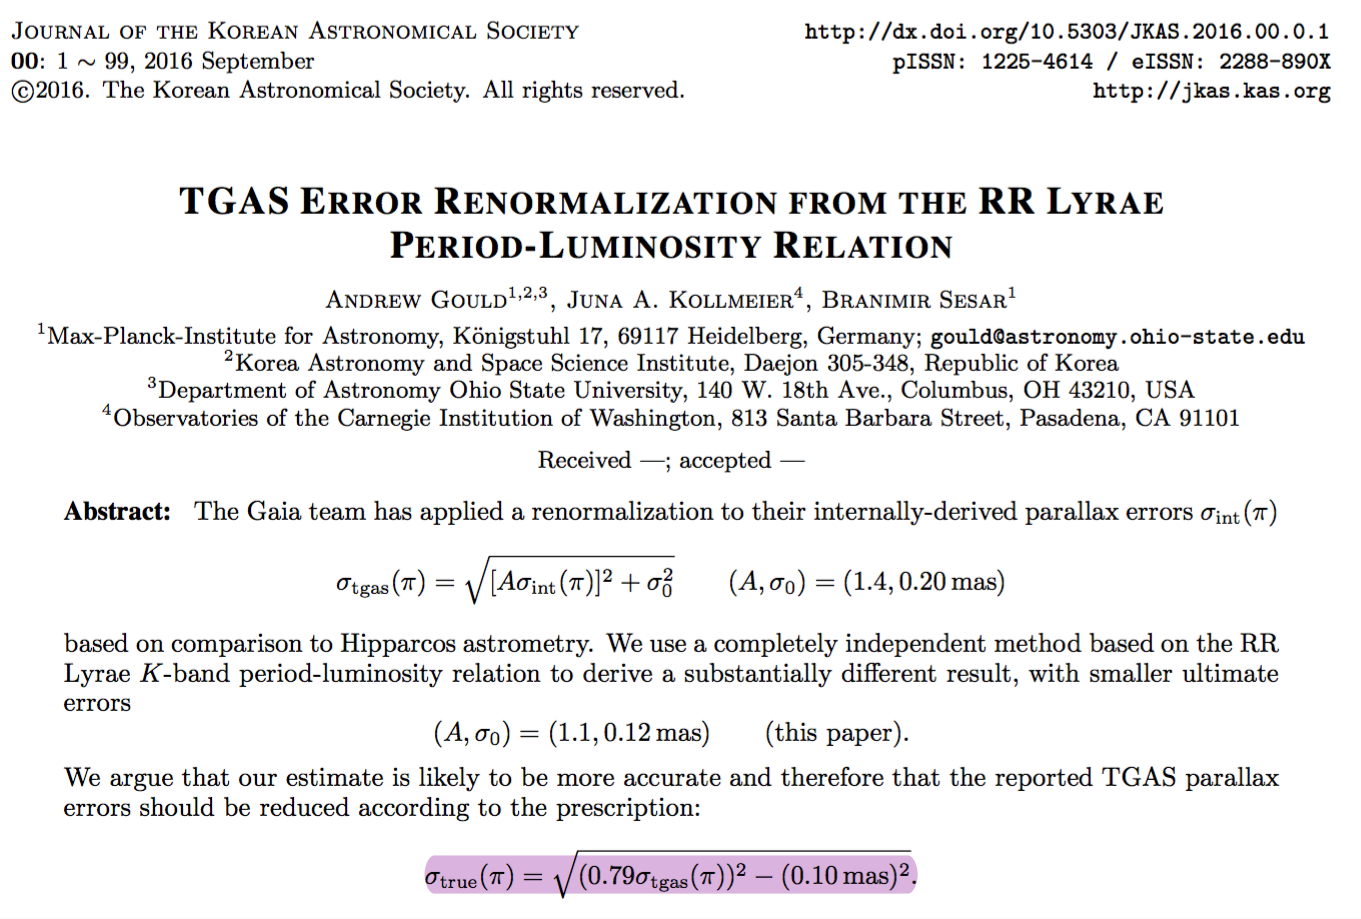

In [224]:
Image("gould_kollmeier_abstract.png")

Units of Plx and e_Plx columns as mas, so can use these directly to create new variable with reduced uncertainty, **e_gks**

Remember here $\sigma(\pi)$ is $\sigma$ that depends on $\pi$ -- not $\sigma \times \pi$

In [225]:
analysis_df['e_gks'] = np.sqrt((0.79*analysis_df['e_Plx'])**2 - (0.10)**2)

/anaconda/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [226]:
analysis_df

Name  Period Type  mag_3p6  err_3p6  amp_3p6  mag_4p5  err_4p5  \
0     ABUma   0.600   ab    9.598    0.003    0.171    9.587    0.003   
1     AMTuc   0.406    c   10.602    0.002    0.127   10.565    0.002   
2     ANSer   0.522   ab    9.801    0.004    0.289    9.795    0.004   
3     AVPeg   0.390   ab    9.332    0.004    0.281    9.329    0.004   
4     BHPeg   0.641   ab    9.002    0.003    0.237    8.982    0.003   
5     BXLeo   0.363    c   10.678    0.002    0.107   10.670    0.002   
6     CSEri   0.311    c    8.126    0.002    0.117    8.110    0.002   
7     DXDel   0.473   ab    8.653    0.004    0.249    8.641    0.004   
8     HKPup   0.734   ab    9.884    0.004    0.252    9.854    0.004   
9     MTTel   0.317    c    8.078    0.002    0.126    8.064    0.002   
10    RRGem   0.397   ab   10.243    0.004    0.316   10.222    0.004   
11    RRLyr   0.567   ab    6.472    0.003    0.218    6.463    0.003   
12    RUPsc   0.390    c    9.085    0.002    0.116    9.072    0.002   
13    RvCrB   0.332    c   10.494    0.002    0.105   10.471    0.002   
14    RVUma   0.468   ab    9.760    0.004    0.326    9.746    0.004   
15    RXEri   0.587   ab    8.340    0.004    0.279    8.315    0.004   
16    RZCep   0.309    c    7.871    0.002    0.119    7.858    0.002   
17    STBoo   0.622   ab    9.842    0.005    0.348    9.823    0.005   
18    STCVn   0.329    c   10.439    0.002    0.120   10.414    0.002   
19    SUDra   0.660   ab    8.600    0.004    0.281    8.584    0.004   
20    SVEri   0.714   ab    8.568    0.003    0.209    8.551    0.003   
21    SVHya   0.479   ab    9.370    0.004    0.293    9.351    0.004   
22    SVScl   0.377    c   10.502    0.002    0.100   10.494    0.002   
23    SWAnd   0.442   ab    8.489    0.004    0.279    8.475    0.004   
24    SWDra   0.570   ab    9.306    0.004    0.257    9.288    0.004   
25    SXUma   0.307    c   10.077    0.002    0.107   10.066    0.002   
26    TTLyn   0.597   ab    8.587    0.003    0.221    8.574    0.003   
27    TUUma   0.558   ab    8.623    0.004    0.293    8.609    0.004   
28    TVBoo   0.313    c   10.198    0.002    0.133   10.181    0.002   
29    TWHer   0.400   ab   10.239    0.004    0.304   10.213    0.005   
30    UUVir   0.476   ab    9.492    0.004    0.308    9.483    0.004   
31    UVOct   0.543   ab    8.182    0.004    0.244    8.170    0.004   
32    UYBoo   0.651   ab    9.725    0.003    0.227    9.700    0.004   
33  V440Sgr   0.477   ab    9.040    0.004    0.322    9.023    0.004   
34    VXHer   0.455   ab    9.601    0.005    0.332    9.580    0.004   
35     VInd   0.480   ab    8.852    0.004    0.281    8.834    0.004   
36    WYAnt   0.574   ab    9.569    0.004    0.261    9.552    0.004   
37    XZCyg   0.467   ab    8.657    0.003    0.225    8.641    0.004   
38     XAri   0.651   ab    7.888    0.004    0.289    7.862    0.004   
39    YZCap   0.273    c   10.338    0.001    0.093   10.321    0.001   

    amp_4p5     RA_ICRS    DE_ICRS   Plx  e_Plx id_compare     e_gks  
0     0.177  182.810685  47.828763  0.93   0.27      abuma  0.188406  
1     0.142   19.627973 -67.918161  0.85   0.26      amtuc  0.179413  
2     0.299  238.379390  12.961105  0.77   0.29      anser  0.206123  
3     0.281  328.011708  22.574791  1.53   0.23      avpeg  0.151707  
4     0.236  343.254215  15.787682  1.40   0.22      bhpeg  0.142149  
5     0.122  174.508478  16.543330  0.53   0.28      bxleo  0.197305  
6     0.117   39.274539 -42.963311  2.16   0.23      cseri  0.151707  
7     0.258  311.868205  12.464108  1.66   0.22      dxdel  0.142149  
8     0.257  116.195095 -13.098978  0.53   0.26      hkpup  0.179413  
9     0.111  285.550322 -46.653841  1.43   0.31      mttel  0.223553  
10    0.313  110.389028  30.873284  0.74   0.26      rrgem  0.179413  
11    0.213  291.365682  42.783543  3.64   0.23      rrlyr  0.151707  
12    0.110   18.608921  24.415488  1.44   0.30      rupsc  0.214870  
13    0.120  244.85

How do the old and new parallax errors compare for these stars?

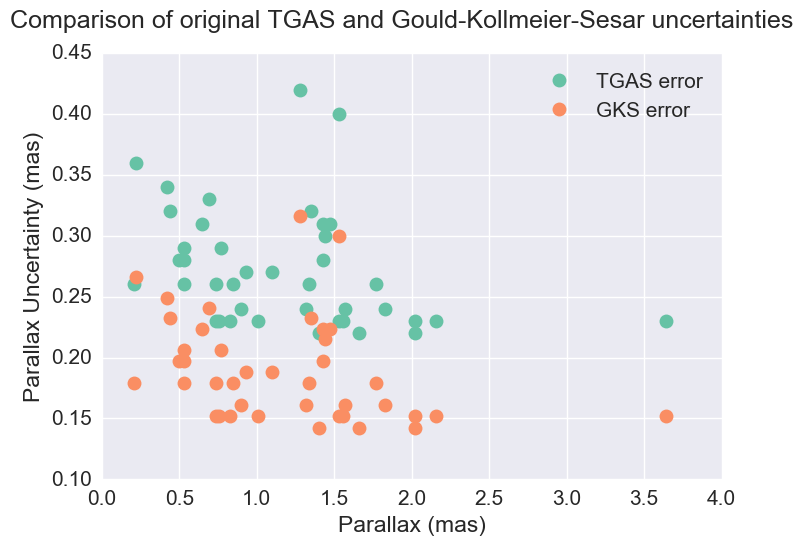

In [98]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())


mp.plot(analysis_df['Plx'], analysis_df['e_Plx'], 'o', ls='None', ms=10, zorder=4, color=next(palette), label='TGAS error')
mp.plot(analysis_df['Plx'], analysis_df['e_gks'], 'o', ls='None', ms=10, zorder=4, color=next(palette), label='GKS error')

mp.xlabel('Parallax (mas)')
mp.ylabel('Parallax Uncertainty (mas)')
mp.suptitle('Comparison of original TGAS and Gould-Kollmeier-Sesar uncertainties')

mp.legend(loc='best')


* Now convert the parallaxes into distances and start to look at the PL relations

* Not doing LKH correction
    * See notes from Andy on why LKH is inapporopriate for individual stars.
    
* Convert parallaxes to distances
    * pi is in mas
    $$ d = \frac{1}{(\pi \times 10^{-3})} $$
    * d is in pc
    $$ \frac{\sigma_{d}}{d} = \frac{\sigma_{\pi}}{\pi} $$
    
    $$ \sigma_{d} = d \frac{\sigma_{\pi}}{\pi} $$
    
* Convert distance in pc to distance modulus

$$ \mu = 5 \log d - 5 $$

* But what is the error on the distance modulus??
    * It's asymmetric, but how is it calculated?
    * Calculate $\pm 1\sigma$ for now, do it properly later
    
    

In [227]:
## Correct values of distances and uncertainties
## Deriving distances directly from parallax measurements, no lutz kelker correction, 50% uncertainties

analysis_df = analysis_df.convert_objects(convert_numeric=True)

analysis_df['distance_pc'] = (1./ (analysis_df.Plx * 10**(-3)))
#analysis_df['e_distance_pc'] = analysis_df.distance_pc * analysis_df.e_gks / analysis_df.Plx
analysis_df['mu_dist'] = 5. * np.log10(analysis_df.distance_pc) - 5.0

### Calculating TGAS uncertainties too to show on plots

#analysis_df['e_dist_tgas'] = analysis_df.distance_pc * analysis_df.e_Plx / analysis_df.Plx

## Calculate average errorbars in both cases. 
## This code gives asymmetric error bars too, but not sure how to fit them right now.

## Reduced errors
#analysis_df['mu_p_1sig'] = 5*np.log10(analysis_df.distance_pc + analysis_df.e_distance_pc) - 5.
#analysis_df['mu_m_1sig'] = 5*np.log10(analysis_df.distance_pc - analysis_df.e_distance_pc) - 5.
#analysis_df['mu_av_err'] = (analysis_df.mu_p_1sig - analysis_df.mu_m_1sig)/2.



## TGAS errors
#analysis_df['mu_p_1sig_tgas'] = 5*np.log10(analysis_df.distance_pc + analysis_df.e_dist_tgas) - 5.
#analysis_df['mu_m_1sig_tgas'] = 5*np.log10(analysis_df.distance_pc - analysis_df.e_dist_tgas) - 5.
#analysis_df['mu_av_err_tgas'] = (analysis_df.mu_p_1sig_tgas - analysis_df.mu_m_1sig_tgas)/2.

analysis_df['good_err'] = np.where(((analysis_df['Plx'] - analysis_df['e_Plx'])>0), True, np.nan)

analysis_df = analysis_df.dropna(axis=0, how='all', subset=['good_err'])


/anaconda/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Need to convert the apparent mags to absolute mags - correct for distance and extinction

$$\mu = m - M - A_{3.6}$$
$$M = m - \mu - A_{3.6}$$

and the same for 4.5 $\mu$m

## Do not have a good strategy for extinction yet - need to think about this - leaving it here as a reminder

In [101]:
## Calculating infrared extinction

analysis_df['A_v'] = np.nan

analysis_df['A_3p6'] = red.ccm_nearir(2.19, 3.1)*red.indebetouw_ir(3.545)*analysis_df.A_v
analysis_df['A_4p5'] = red.ccm_nearir(2.19, 3.1)*red.indebetouw_ir(4.442)*analysis_df.A_v


## Remember to uncomment the reddening part of the next cell to apply the reddening correction

In [228]:
## Calculate abs mags

analysis_df['M_3p6'] = analysis_df.mag_3p6 - analysis_df.mu_dist #- analysis_df.A36
analysis_df['M_4p5'] = analysis_df.mag_4p5 - analysis_df.mu_dist #- analysis_df.A45

### Correct uncertainties 

analysis_df['e_M_3p6_gks'] = np.abs(np.sqrt((analysis_df.err_3p6/analysis_df.mag_3p6)**2 + (5*analysis_df.e_gks/np.log(10)*analysis_df.Plx)**2)*analysis_df.M_3p6)
analysis_df['e_M_4p5_gks'] = np.abs(np.sqrt((analysis_df.err_4p5/analysis_df.mag_4p5)**2 + (5*analysis_df.e_gks/np.log(10)*analysis_df.Plx)**2)*analysis_df.M_4p5)

analysis_df['e_M_3p6_tgas'] = np.abs(np.sqrt((analysis_df.err_3p6/analysis_df.mag_3p6)**2 + (5*analysis_df.e_Plx/np.log(10)*analysis_df.Plx)**2)*analysis_df.M_3p6)
analysis_df['e_M_4p5_tgas'] = np.abs(np.sqrt((analysis_df.err_4p5/analysis_df.mag_4p5)**2 + (5*analysis_df.e_Plx/np.log(10)*analysis_df.Plx)**2)*analysis_df.M_4p5)


In [229]:
analysis_df

Name  Period Type  mag_3p6  err_3p6  amp_3p6  mag_4p5  err_4p5  \
0     ABUma   0.600   ab    9.598    0.003    0.171    9.587    0.003   
1     AMTuc   0.406    c   10.602    0.002    0.127   10.565    0.002   
2     ANSer   0.522   ab    9.801    0.004    0.289    9.795    0.004   
3     AVPeg   0.390   ab    9.332    0.004    0.281    9.329    0.004   
4     BHPeg   0.641   ab    9.002    0.003    0.237    8.982    0.003   
5     BXLeo   0.363    c   10.678    0.002    0.107   10.670    0.002   
6     CSEri   0.311    c    8.126    0.002    0.117    8.110    0.002   
7     DXDel   0.473   ab    8.653    0.004    0.249    8.641    0.004   
8     HKPup   0.734   ab    9.884    0.004    0.252    9.854    0.004   
9     MTTel   0.317    c    8.078    0.002    0.126    8.064    0.002   
10    RRGem   0.397   ab   10.243    0.004    0.316   10.222    0.004   
11    RRLyr   0.567   ab    6.472    0.003    0.218    6.463    0.003   
12    RUPsc   0.390    c    9.085    0.002    0.116    9.072    0.002   
13    RvCrB   0.332    c   10.494    0.002    0.105   10.471    0.002   
14    RVUma   0.468   ab    9.760    0.004    0.326    9.746    0.004   
15    RXEri   0.587   ab    8.340    0.004    0.279    8.315    0.004   
16    RZCep   0.309    c    7.871    0.002    0.119    7.858    0.002   
17    STBoo   0.622   ab    9.842    0.005    0.348    9.823    0.005   
19    SUDra   0.660   ab    8.600    0.004    0.281    8.584    0.004   
20    SVEri   0.714   ab    8.568    0.003    0.209    8.551    0.003   
21    SVHya   0.479   ab    9.370    0.004    0.293    9.351    0.004   
22    SVScl   0.377    c   10.502    0.002    0.100   10.494    0.002   
23    SWAnd   0.442   ab    8.489    0.004    0.279    8.475    0.004   
24    SWDra   0.570   ab    9.306    0.004    0.257    9.288    0.004   
25    SXUma   0.307    c   10.077    0.002    0.107   10.066    0.002   
26    TTLyn   0.597   ab    8.587    0.003    0.221    8.574    0.003   
27    TUUma   0.558   ab    8.623    0.004    0.293    8.609    0.004   
28    TVBoo   0.313    c   10.198    0.002    0.133   10.181    0.002   
29    TWHer   0.400   ab   10.239    0.004    0.304   10.213    0.005   
30    UUVir   0.476   ab    9.492    0.004    0.308    9.483    0.004   
31    UVOct   0.543   ab    8.182    0.004    0.244    8.170    0.004   
33  V440Sgr   0.477   ab    9.040    0.004    0.322    9.023    0.004   
34    VXHer   0.455   ab    9.601    0.005    0.332    9.580    0.004   
35     VInd   0.480   ab    8.852    0.004    0.281    8.834    0.004   
36    WYAnt   0.574   ab    9.569    0.004    0.261    9.552    0.004   
37    XZCyg   0.467   ab    8.657    0.003    0.225    8.641    0.004   
38     XAri   0.651   ab    7.888    0.004    0.289    7.862    0.004   
39    YZCap   0.273    c   10.338    0.001    0.093   10.321    0.001   

    amp_4p5     RA_ICRS      ...          e_gks  distance_pc    mu_dist  \
0     0.177  182.810685      ...       0.188406  1075.268817  10.157585   
1     0.142   19.627973      ...       0.179413  1176.470588  10.352905   
2     0.299  238.379390      ...       0.206123  1298.701299  10.567546   
3     0.281  328.011708      ...       0.151707   653.594771   9.076543   
4     0.236  343.254215      ...       0.142149   714.285714   9.269360   
5     0.122  174.508478      ...       0.197305  1886.792453  11.378621   
6     0.117   39.274539      ...       0.151707   462.962963   8.327731   
7     0.258  311.868205      ...       0.142149   602.409639   8.899460   
8     0.257  116.195095      ...       0.179413  1886.792453  11.378621   
9     0.111  285.550322      ...       0.223553   699.300699   9.223320   
10    0.313  110.389028      ...       0.179413  1351.351351  10.653841   
11    0.213  291.365682      ...       0.151707   274.725275   7.194493   
12    0.110   18.608921      ...       0.214870   694.444444   9.208188   
13    0.120  244.857603      ...       0.197305  2000.000000  11.505150   
14    0.339  203.325156      ...  

In [230]:
analysis_df['log_P'] = np.log10(analysis_df['Period'])
analysis_df['logP_f'] = np.where(analysis_df['Type']=='c', analysis_df['log_P'] + 0.127, analysis_df['log_P'])

M4 PL relations from Neely et al. (2015)
===
Page 11, table 3:

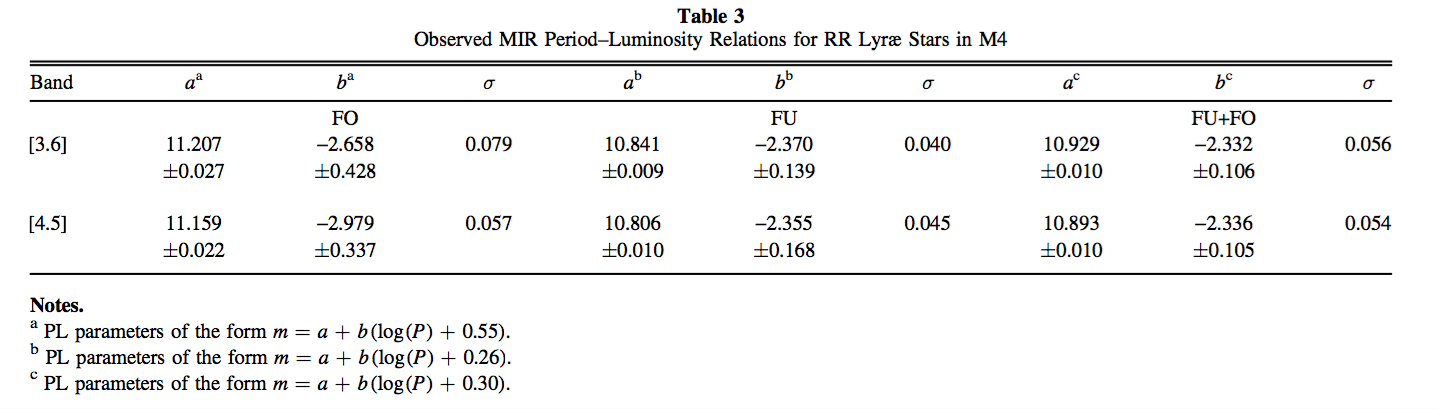

In [105]:
Image("neeley_m4_pls.png")

In [231]:
def M4_ab_36(logp, zp):
    return -2.370*(logp + 0.26) + zp

def M4_ab_45(logp, zp):
    return -2.355*(logp + 0.26) + zp

def M4_c_36(logp, zp):
    return -2.658*(logp + 0.55) + zp

def M4_c_45(logp, zp):
    return -2.979*(logp + 0.55) + zp

def M4_fund_36(logp, zp):
    return -2.332*(logp + 0.30) + zp

def M4_fund_45(logp, zp):
    return -2.336*(logp + 0.30) + zp

def free_fit(logp, slope, zp):
    av_p = np.mean(logp)
    return slope*(logp - av_p) + zp

m4_fund_slope_36 = -2.332
m4_fund_slope_45 = -2.336

m4_fund_avp = 0.30


The M4 PL relations aren't in the ideal format right now - they need to be transformed to be fit around the mid-point of the galactic calibrator samples. Right now I just want to use them for a quick look comparison.

Going to do three fits to start with - RRab, RRc, whole sample fundamentalised.

In [107]:
## Fit and plot the fundamentalised PL relations:

columns = ['slope', 'e_slope', 'zeropoint', 'e_zeropoint', 'mean_logp', 'source', 'type', 'band', 'sample', 'n_stars']

fit_df = pd.DataFrame(columns=columns)

#analysis_df['abs_m_err'] = abs(analysis_df.mu_m_1sig - analysis_df.mu_dist)
#analysis_df['abs_p_err'] = abs(analysis_df.mu_p_1sig - analysis_df.mu_dist)
#analysis_df['abs_av_err'] = (analysis_df.abs_m_err + analysis_df.abs_p_err) / 2.0

#analysis_df['tgas_m_err'] = abs(analysis_df.mu_m_1sig_tgas - analysis_df.mu_dist)
#analysis_df['tgas_p_err'] = abs(analysis_df.mu_p_1sig_tgas - analysis_df.mu_dist)
#analysis_df['tgas_av_err'] = (analysis_df.tgas_m_err + analysis_df.tgas_p_err) / 2.0

### Use error columns e_M_3p6_gks etc

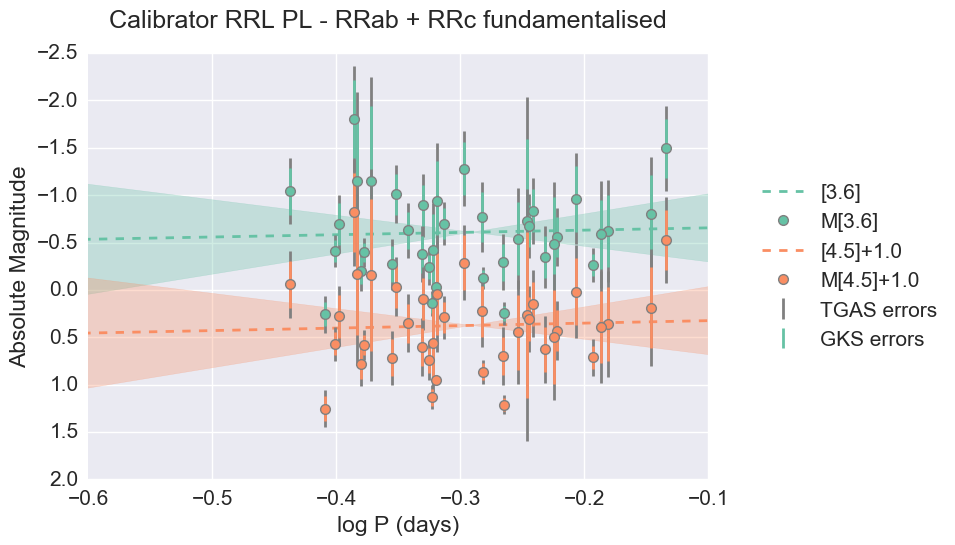

In [108]:
p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_3p6)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(analysis_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
mp.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
mp.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
mp.plot(analysis_df.logP_f, analysis_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[3.6]')

popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_4p5)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(analysis_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp)+1.0, ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp)+1.0, alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp+1.0, ls='--', label="[4.5]+1.0", color=col)
mp.errorbar(analysis_df.logP_f, analysis_df.M_4p5+1.0, yerr = analysis_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
mp.errorbar(analysis_df.logP_f, analysis_df.M_4p5+1.0, yerr = analysis_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
mp.plot(analysis_df.logP_f, analysis_df.M_4p5+1.0, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[4.5]+1.0')



mp.xlim(-0.6, -0.1)
mp.ylim(2.0, -2.5)
mp.xlabel('log P (days)')
mp.ylabel('Absolute Magnitude')
mp.suptitle('Calibrator RRL PL - RRab + RRc fundamentalised')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))



In [109]:
fit_df

slope   e_slope  zeropoint  e_zeropoint  mean_logp   source  type band  \
0 -0.241000  0.940018  -0.607412     0.005528  -0.296645  FreeFit  Fund  3p6   
1 -0.262061  0.939477  -0.623728     0.005525  -0.296645  FreeFit  Fund  4p5   

     sample  n_stars  
0  complete     38.0  
1  complete     38.0

Obviously something going on with the uncertainties on a few of these, but I don't want to cut down the sample just yet. 

Going to have a quick look at the RRab's and RRc's separately first, then have a look at cutting the samples.

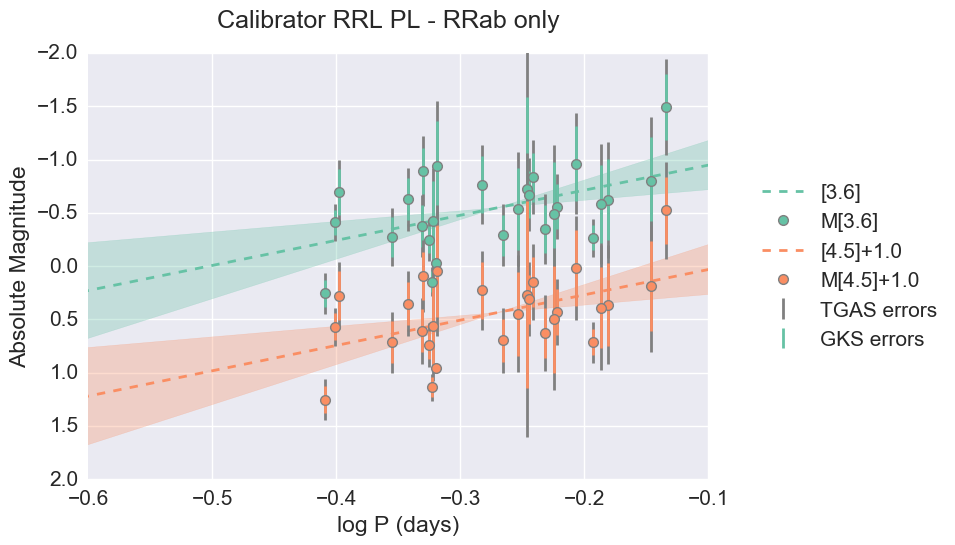

In [110]:
p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_3p6'])

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(ab_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])


col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
mp.errorbar(ab_df['log_P'], ab_df['M_3p6'], yerr = ab_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
mp.errorbar(ab_df.log_P, ab_df.M_3p6, yerr = ab_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
mp.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[3.6]')

popt, pcov = curve_fit(free_fit, ab_df.log_P, ab_df.M_4p5)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(ab_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp)+1.0, ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp)+1.0, alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp+1.0, ls='--', label="[4.5]+1.0", color=col)
mp.errorbar(ab_df.log_P, ab_df.M_4p5+1.0, yerr = ab_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
mp.errorbar(ab_df.log_P, ab_df.M_4p5+1.0, yerr = ab_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
mp.plot(ab_df.log_P, ab_df.M_4p5+1.0, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[4.5]+1.0')



mp.xlim(-0.6, -0.1)
mp.ylim(2.0, -2.0)
mp.xlabel('log P (days)')
mp.ylabel('Absolute Magnitude')
mp.suptitle('Calibrator RRL PL - RRab only')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))



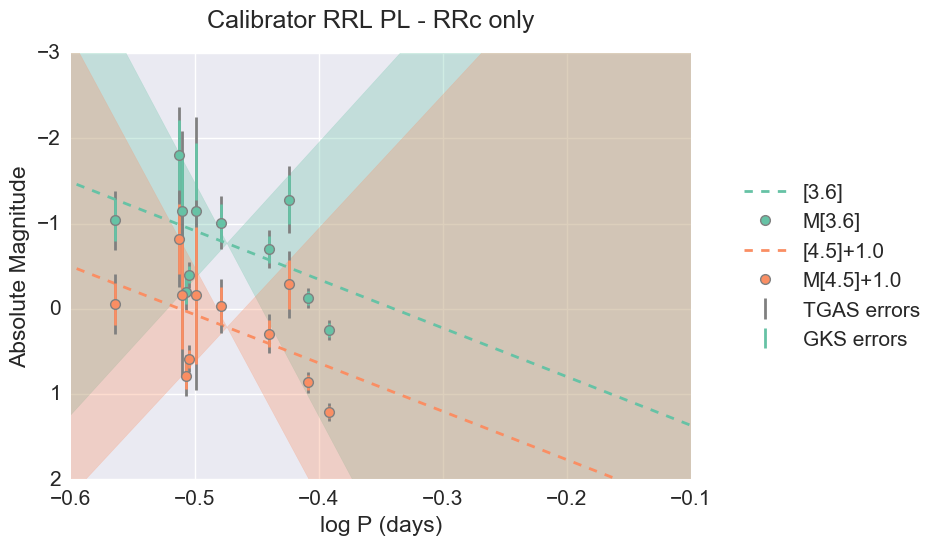

In [111]:
p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_3p6'])

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(c_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
mp.errorbar(c_df.log_P, c_df.M_3p6, yerr=c_df.e_M_3p6_tgas, ls='None', zorder=2, color='Grey', label='TGAS errors')
mp.errorbar(c_df.log_P, c_df.M_3p6, yerr=c_df.e_M_3p6_gks, ls='None', zorder=4, color=col, label='GKS errors')
mp.plot(c_df.log_P, c_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[3.6]')

popt, pcov = curve_fit(free_fit, c_df.log_P, c_df.M_4p5)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(c_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp)+1.0, ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp)+1.0, alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp+1.0, ls='--', label="[4.5]+1.0", color=col)
mp.errorbar(c_df.log_P, c_df.M_4p5+1.0, yerr = c_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
mp.errorbar(c_df.log_P, c_df.M_4p5+1.0, yerr = c_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
mp.plot(c_df.log_P, c_df.M_4p5+1.0, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[4.5]+1.0')



mp.xlim(-0.6, -0.1)
mp.ylim(2.0, -3.0)
mp.xlabel('log P (days)')
mp.ylabel('Absolute Magnitude')
mp.suptitle('Calibrator RRL PL - RRc only')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))



OK - more RRc's in this sample than we originally thought. Still 2:1 ratio of RRab:RRc but this could prove interesting.

Let's look at the error distribution of the parallax uncertainties

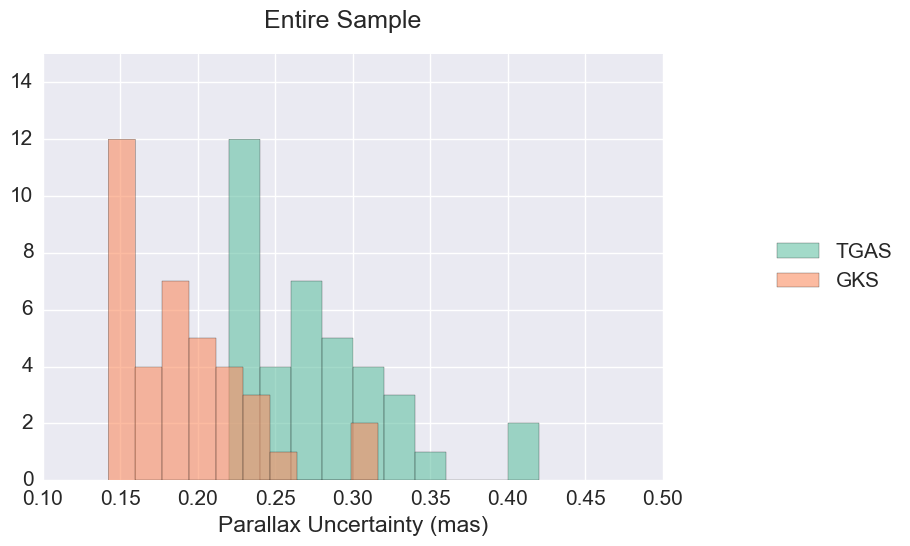

In [112]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

col = next(palette)
mp.hist(analysis_df[~np.isnan(analysis_df['e_Plx'])].e_Plx, color=col, label='TGAS', alpha=0.6)
col = next(palette)
mp.hist(analysis_df[~np.isnan(analysis_df['e_gks'])].e_gks, color=col, label='GKS', alpha=0.6)

mp.xlabel('Parallax Uncertainty (mas)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.xlim(0.1, 0.5)
mp.ylim(0, 15)
mp.suptitle('Entire Sample')



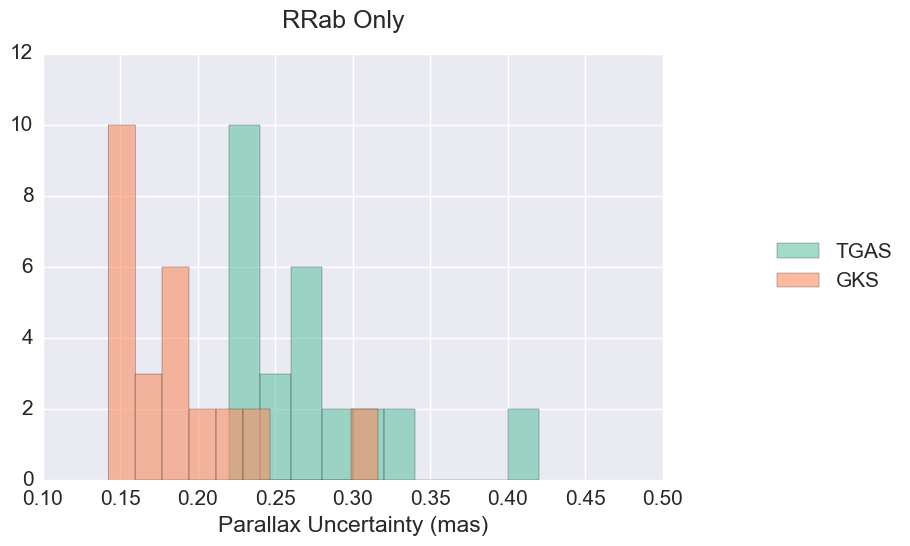

In [113]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

col = next(palette)
mp.hist(ab_df[~np.isnan(ab_df['e_Plx'])].e_Plx, color=col, label='TGAS', alpha=0.6)
col = next(palette)
mp.hist(ab_df[~np.isnan(ab_df['e_gks'])].e_gks, color=col, label='GKS', alpha=0.6)

mp.xlabel('Parallax Uncertainty (mas)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.xlim(0.1, 0.5)
mp.ylim(0, 12)
mp.suptitle('RRab Only')



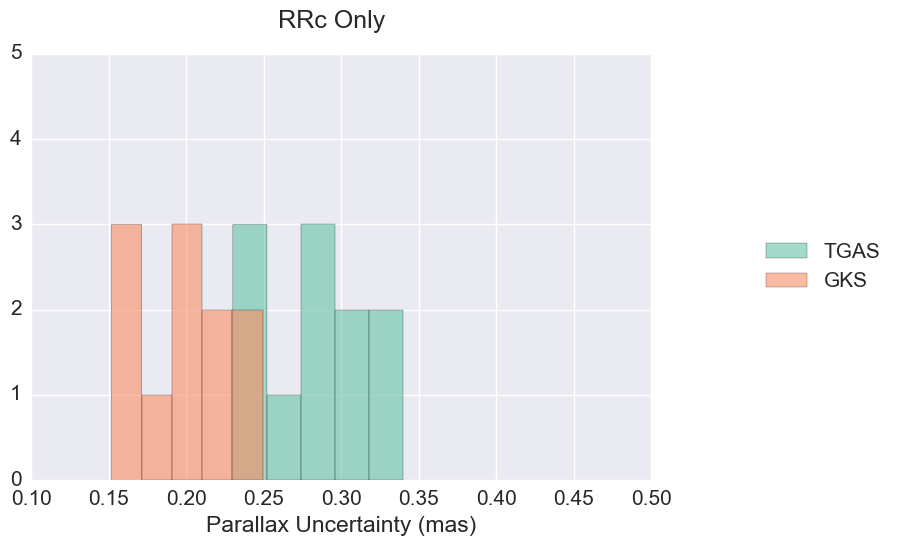

In [114]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

col = next(palette)
mp.hist(c_df[~np.isnan(c_df['e_Plx'])].e_Plx, color=col, label='TGAS', alpha=0.6, bins=5)
col = next(palette)
mp.hist(c_df[~np.isnan(c_df['e_gks'])].e_gks, color=col, label='GKS', alpha=0.6, bins=5)

mp.xlabel('Parallax Uncertainty (mas)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.xlim(0.1, 0.5)
mp.ylim(0, 5)
mp.suptitle('RRc Only')



First cut - e_gks < 0.25 mas

Denoted by ecut1 in fit_df

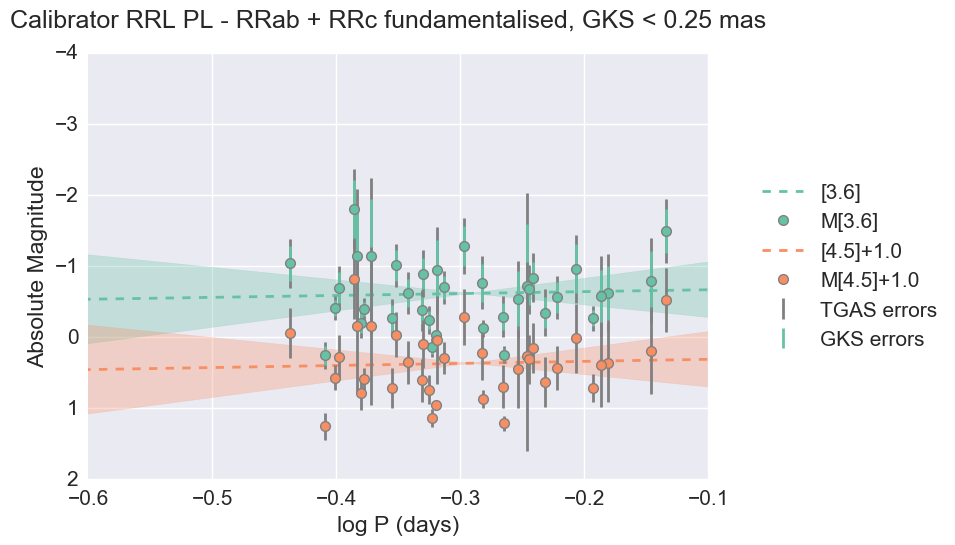

In [115]:
p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

ecut1_df = analysis_df.where(analysis_df.e_gks<0.25).dropna(axis=0, how='all')
ecut1_df = ecut1_df.reset_index(drop=True)
popt, pcov = curve_fit(free_fit, ecut1_df.logP_f, ecut1_df.M_3p6)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ecut1_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '3p6', 'sample' : 'ecut1', 'n_stars': len(ecut1_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ecut1_df.logP_f)

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
mp.errorbar(ecut1_df.logP_f, ecut1_df.M_3p6, yerr = ecut1_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
mp.errorbar(ecut1_df.logP_f, ecut1_df.M_3p6, yerr = ecut1_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
mp.plot(ecut1_df.logP_f, ecut1_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[3.6]')

popt, pcov = curve_fit(free_fit, ecut1_df.logP_f, ecut1_df.M_4p5)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ecut1_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '4p5', 'sample' : 'ecut1', 'n_stars': len(ecut1_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ecut1_df.logP_f)

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp)+1.0, ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp)+1.0, alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp+1.0, ls='--', label="[4.5]+1.0", color=col)
mp.errorbar(ecut1_df.logP_f, ecut1_df.M_4p5+1.0, yerr = ecut1_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
mp.errorbar(ecut1_df.logP_f, ecut1_df.M_4p5+10, yerr = ecut1_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
mp.plot(ecut1_df.logP_f, ecut1_df.M_4p5+1.0, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[4.5]+1.0')



mp.xlim(-0.6, -0.1)
mp.ylim(2.0, -4.0)
mp.xlabel('log P (days)')
mp.ylabel('Absolute Magnitude')
mp.suptitle('Calibrator RRL PL - RRab + RRc fundamentalised, GKS < 0.25 mas')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))



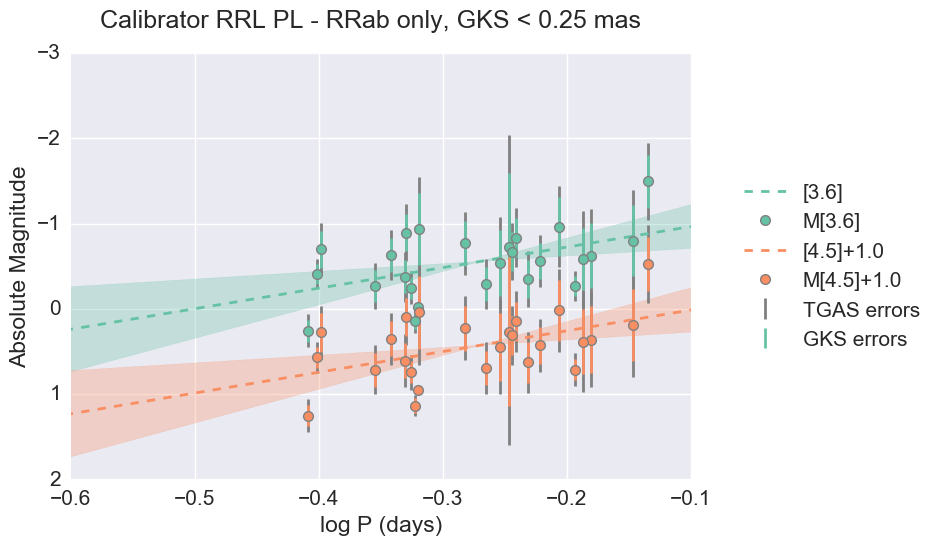

In [116]:
p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

ab_df = ecut1_df.where(ecut1_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_3p6'])

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '3p6', 'sample' : 'ecut1', 'n_stars': len(ab_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])


col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
mp.errorbar(ab_df['log_P'], ab_df['M_3p6'], yerr = ab_df.e_M_3p6_tgas, ls='None',zorder=2, color='Grey', label='TGAS errors')
mp.errorbar(ab_df.log_P, ab_df.M_3p6, yerr = ab_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
mp.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[3.6]')

popt, pcov = curve_fit(free_fit, ab_df.log_P, ab_df.M_4p5)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '4p5', 'sample' : 'ecut1', 'n_stars': len(ab_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp)+1.0, ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp)+1.0, alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp+1.0, ls='--', label="[4.5]+1.0", color=col)
mp.errorbar(ab_df.log_P, ab_df.M_4p5+1.0, yerr = ab_df.e_M_4p5_tgas, ls='None',zorder=2, color='Grey', label='_nolegend_')
mp.errorbar(ab_df.log_P, ab_df.M_4p5+1.0, yerr = ab_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
mp.plot(ab_df.log_P, ab_df.M_4p5+1.0, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[4.5]+1.0')



mp.xlim(-0.6, -0.1)
mp.ylim(2.0, -3.0)
mp.xlabel('log P (days)')
mp.ylabel('Absolute Magnitude')
mp.suptitle('Calibrator RRL PL - RRab only, GKS < 0.25 mas')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))



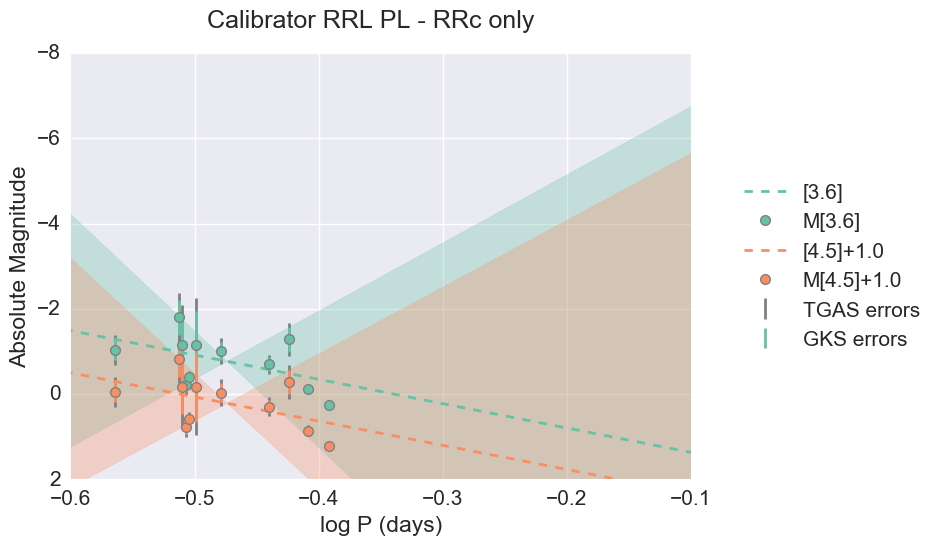

In [117]:
p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

c_df = ecut1_df.where(ecut1_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_3p6'])

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '3p6', 'sample' : 'ecut1', 'n_stars': len(c_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
mp.errorbar(c_df['log_P'], c_df['M_3p6'], yerr = c_df.e_M_3p6_tgas, ls='None',zorder=2, color='Grey', label='TGAS errors')
mp.errorbar(c_df.log_P, c_df.M_3p6, yerr = c_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
mp.plot(c_df.log_P, c_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[3.6]')

popt, pcov = curve_fit(free_fit, c_df.log_P, c_df.M_4p5)

fit_df = fit_df.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '4p5', 'sample' : 'ecut1', 'n_stars': len(c_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])

col = next(palette)

mp.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp)+1.0, ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp)+1.0, alpha = 0.3, color=col)

mp.plot(p1, slope*(p1-mean)+ zp+1.0, ls='--', label="[4.5]+1.0", color=col)
mp.errorbar(c_df.log_P, c_df.M_4p5+1.0, yerr = c_df.e_M_4p5_tgas, ls='None',zorder=2, color='Grey', label='_nolegend_')
mp.errorbar(c_df.log_P, c_df.M_4p5+1.0, yerr = c_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
mp.plot(c_df.log_P, c_df.M_4p5+1.0, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='M[4.5]+1.0')



mp.xlim(-0.6, -0.1)
mp.ylim(2.0, -8.0)
mp.xlabel('log P (days)')
mp.ylabel('Absolute Magnitude')
mp.suptitle('Calibrator RRL PL - RRc only')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))



In [118]:
fit_df

slope    e_slope  zeropoint  e_zeropoint  mean_logp   source  type  \
0  -0.241000   0.940018  -0.607412     0.005528  -0.296645  FreeFit  Fund   
1  -0.262061   0.939477  -0.623728     0.005525  -0.296645  FreeFit  Fund   
2  -2.352694   0.679495  -0.536045     0.003830  -0.275153  FreeFit    ab   
3  -2.375425   0.689798  -0.552452     0.003888  -0.275153  FreeFit    ab   
4   5.707758  10.841959  -0.782587     0.027817  -0.476400  FreeFit     c   
5   5.670048  10.667927  -0.798678     0.027371  -0.476400  FreeFit    ab   
6  -0.267837   1.015430  -0.615783     0.006136  -0.297973  FreeFit  Fund   
7  -0.290677   1.014707  -0.632172     0.006131  -0.297973  FreeFit  Fund   
8  -2.409790   0.753747  -0.542389     0.004444  -0.275344  FreeFit    ab   
9  -2.434626   0.764831  -0.558909     0.004510  -0.275344  FreeFit    ab   
10  5.707758  10.841959  -0.782587     0.027817  -0.476400  FreeFit     c   
11  5.670048  10.667927  -0.798678     0.027371  -0.476400  FreeFit    ab   

   band    sample  n_stars  
0   3p6  complete     38.0  
1   4p5  complete     38.0  
2   3p6  complete     27.0  
3   4p5  complete     27.0  
4   3p6  complete     11.0  
5   4p5  complete     11.0  
6   3p6     ecut1     36.0  
7   4p5     ecut1     36.0  
8   3p6     ecut1     25.0  
9   4p5     ecut1     25.0  
10  3p6     ecut1     11.0  
11  4p5     ecut1     11.0

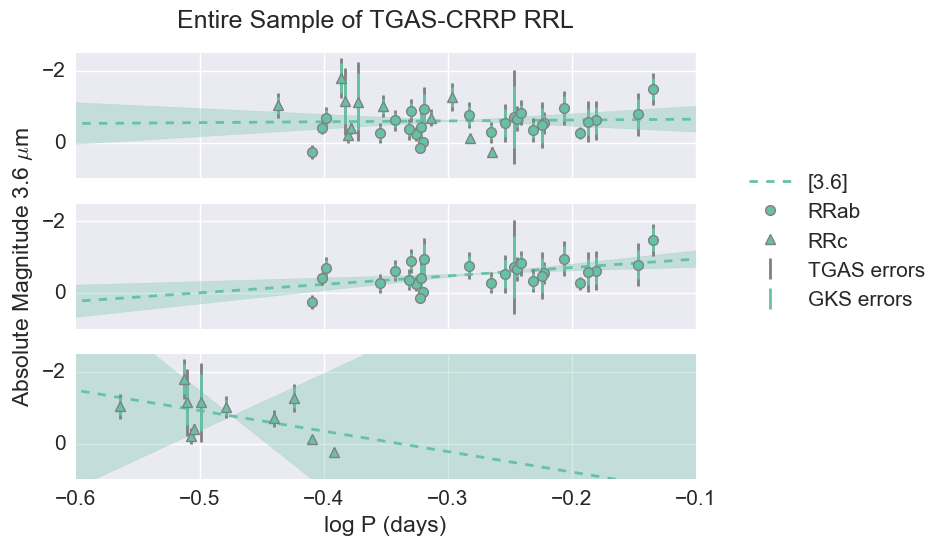

In [119]:
### Fit 3.6 in all variants

columns = ['slope', 'e_slope', 'zeropoint', 'e_zeropoint', 'mean_logp', 'source', 'type', 'band', 'sample', 'n_stars']

fit_df_final = pd.DataFrame(columns=columns)

p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

## Whole sample, no cuts, RRc fundamentalised

popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_3p6)

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(analysis_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)

axp1 = mp.subplot(311)
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -6.0)

axp1.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp1.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp1.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
axp1.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
axp1.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_3p6'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
axp1.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_3p6'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

xticklabels = axp1.get_xticklabels()
mp.setp(xticklabels, visible=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, -0.5))
axp1.set_yticks([0, -2, -4, -6])



## whole sample, no cuts, RRab only

axp2 = mp.subplot(312, sharex=axp1, sharey=axp1)

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_3p6'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(ab_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

axp2.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp2.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp2.errorbar(ab_df['log_P'], ab_df['M_3p6'], yerr = ab_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp2.errorbar(ab_df.log_P, ab_df.M_3p6, yerr = ab_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp2.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
mp.ylabel('Absolute Magnitude 3.6 $\mu$m')

xticklabels = axp2.get_xticklabels()
mp.setp(xticklabels, visible=False)
axp2.set_yticks([0, -2, -4, -6])

## whole sample, no cuts, RRc only

axp3 = mp.subplot(313, sharex=axp1, sharey=axp1)

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_3p6'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(c_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


axp3.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp3.plot(p1, slope*(p1-mean)+ zp, ls='--', label="_nolegend_", color=col)
axp3.errorbar(c_df['log_P'], c_df['M_3p6'], yerr = c_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp3.errorbar(c_df.log_P, c_df.M_3p6, yerr = c_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp3.plot(c_df.log_P, c_df.M_3p6, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
axp3.set_yticks([0, -2, -4, -6])


mp.xlabel('log P (days)')
mp.suptitle('Entire Sample of TGAS-CRRP RRL')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.savefig('crrp_tgas_3p6um.pdf')

## Shaded regions on these figures denote fited PL relation $\pm$ 2$\sigma$

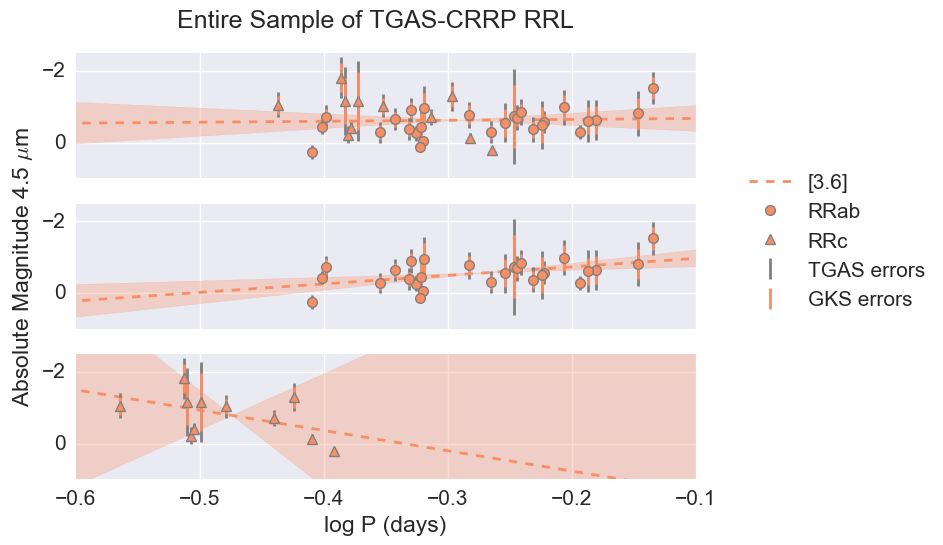

In [120]:
### Fit 4.5 in all variants

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

## Whole sample, no cuts, RRc fundamentalised

popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_4p5)

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(analysis_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)
col = next(palette)


axp1 = mp.subplot(311)
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -6.0)

axp1.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp1.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp1.errorbar(analysis_df.logP_f, analysis_df.M_4p5, yerr = analysis_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
axp1.errorbar(analysis_df.logP_f, analysis_df.M_4p5, yerr = analysis_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='GKS errors')
axp1.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_4p5'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
axp1.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_4p5'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

xticklabels = axp1.get_xticklabels()
mp.setp(xticklabels, visible=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, -0.5))
axp1.set_yticks([0, -2, -4, -6])



## whole sample, no cuts, RRab only

axp2 = mp.subplot(312, sharex=axp1, sharey=axp1)

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_4p5'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(ab_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

axp2.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp2.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp2.errorbar(ab_df['log_P'], ab_df['M_4p5'], yerr = ab_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp2.errorbar(ab_df.log_P, ab_df.M_4p5, yerr = ab_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp2.plot(ab_df.log_P, ab_df.M_4p5, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
mp.ylabel('Absolute Magnitude 4.5 $\mu$m')

xticklabels = axp2.get_xticklabels()
mp.setp(xticklabels, visible=False)
axp2.set_yticks([0, -2, -4, -6])

## whole sample, no cuts, RRc only

axp3 = mp.subplot(313, sharex=axp1, sharey=axp1)

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_4p5'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(c_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


axp3.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp3.plot(p1, slope*(p1-mean)+ zp, ls='--', label="_nolegend_", color=col)
axp3.errorbar(c_df['log_P'], c_df['M_4p5'], yerr = c_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp3.errorbar(c_df.log_P, c_df.M_4p5, yerr = c_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp3.plot(c_df.log_P, c_df.M_4p5, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
axp3.set_yticks([0, -2, -4, -6])


mp.xlabel('log P (days)')
mp.suptitle('Entire Sample of TGAS-CRRP RRL')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)


mp.savefig('crrp_tgas_4p5um.pdf')

In [121]:
fit_df_final

slope    e_slope  zeropoint  e_zeropoint  mean_logp   source  type band  \
0 -0.241000   0.940018  -0.607412     0.005528  -0.296645  FreeFit  Fund  3p6   
1 -2.352694   0.679495  -0.536045     0.003830  -0.275153  FreeFit    ab  3p6   
2  5.707758  10.841959  -0.782587     0.027817  -0.476400  FreeFit     c  3p6   
3 -0.262061   0.939477  -0.623728     0.005525  -0.296645  FreeFit  Fund  4p5   
4 -2.375425   0.689798  -0.552452     0.003888  -0.275153  FreeFit    ab  4p5   
5  5.670048  10.667927  -0.798678     0.027371  -0.476400  FreeFit     c  4p5   

     sample  n_stars  
0  complete     38.0  
1  complete     27.0  
2  complete     11.0  
3  complete     38.0  
4  complete     27.0  
5  complete     11.0

In [122]:
fit_df_final.to_csv('crrp_tgas_noclipping.csv', index=False, header=True, sep=' ', float_format='%4.5f', na_rep= 99.99)

## Using weighted fitting

* Normally wouldn't use weighted fitting, but in this case the errors on the parallaxes are significantly different from star to star.

* Now we have a significant sample of stars, and the errors are no longer directly correlated with period (check this to make sure), so it shouldn't induce a bias.

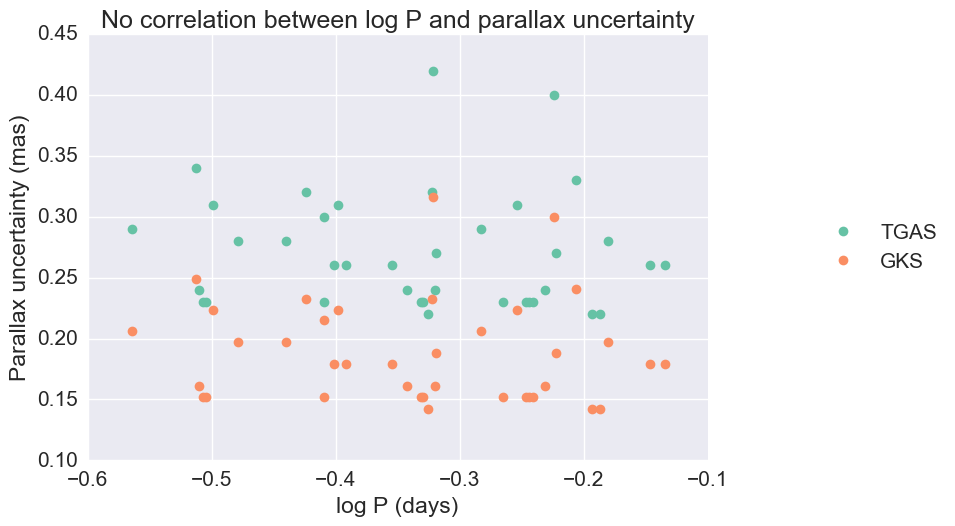

In [123]:

palette = itertools.cycle(sns.color_palette())

mp.plot(analysis_df['log_P'], analysis_df['e_Plx'], 'o', color=next(palette), ls='None', label='TGAS')
mp.plot(analysis_df['log_P'], analysis_df['e_gks'], 'o', color=next(palette), ls='None', label='GKS')
mp.xlabel('log P (days)')
mp.ylabel('Parallax uncertainty (mas)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.title('No correlation between log P and parallax uncertainty')

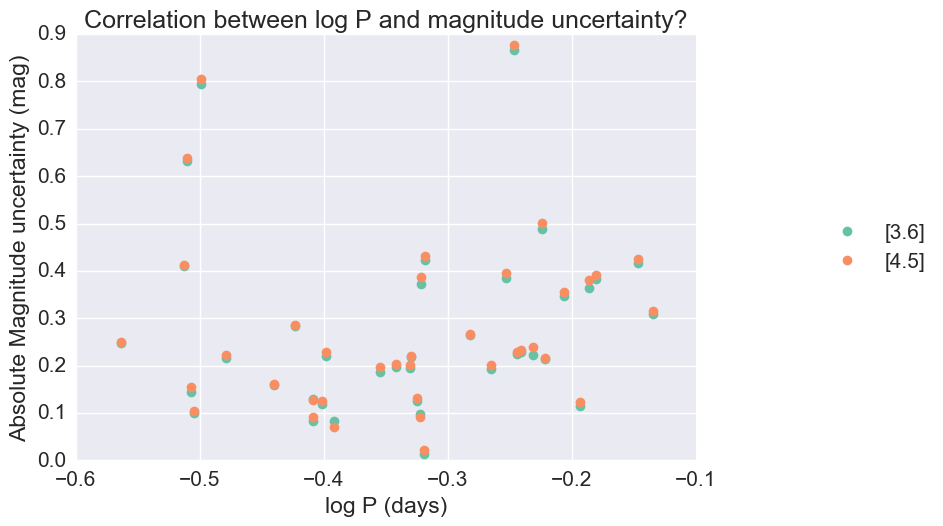

In [124]:
palette = itertools.cycle(sns.color_palette())

mp.plot(analysis_df['log_P'], analysis_df.e_M_3p6_gks, 'o', color=next(palette), ls='None', label='[3.6]')
mp.plot(analysis_df['log_P'], analysis_df.e_M_4p5_gks, 'o', color=next(palette), ls='None', label='[4.5]')
mp.xlabel('log P (days)')
mp.ylabel('Absolute Magnitude uncertainty (mag)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.title('Correlation between log P and magnitude uncertainty?')

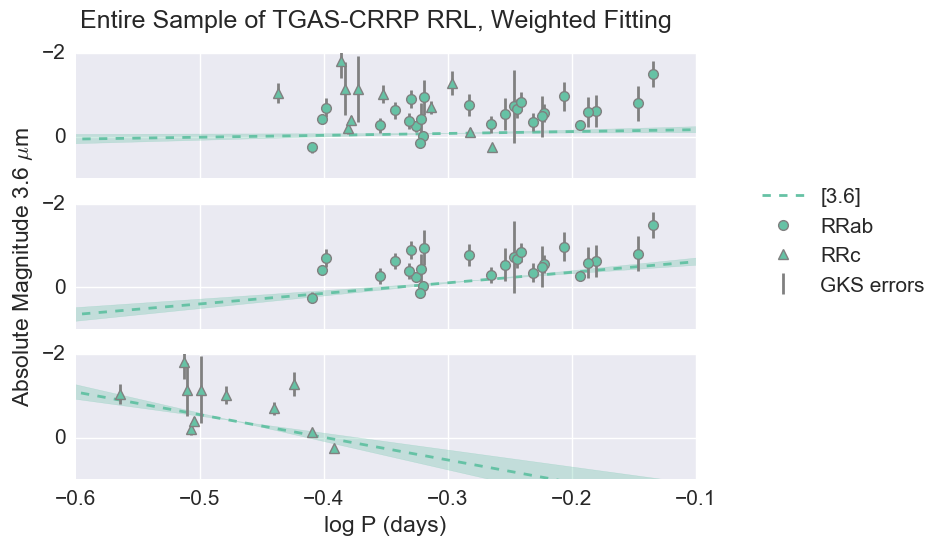

In [125]:
### Fit 3.6 in all variants

columns = ['slope', 'e_slope', 'zeropoint', 'e_zeropoint', 'mean_logp', 'source', 'type', 'band', 'sample', 'n_stars']

fit_df_weighted = pd.DataFrame(columns=columns)

p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

## Whole sample, weighted fit, RRc fundamentalised


popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_3p6, sigma=analysis_df.e_M_3p6_gks, absolute_sigma=True)

fit_df_weighted = fit_df_weighted.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '3p6', 'sample' : 'weighted', 'n_stars': len(analysis_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)

axp1 = mp.subplot(311)
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -6.0)

axp1.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp1.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp1.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_gks, ls='None',zorder=4, color='Grey', label='GKS errors')
axp1.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_3p6'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
axp1.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_3p6'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

xticklabels = axp1.get_xticklabels()
mp.setp(xticklabels, visible=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, -0.5))
axp1.set_yticks([0, -2, -4, -6])



## whole sample, no cuts, RRab only

axp2 = mp.subplot(312, sharex=axp1, sharey=axp1)

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_3p6'], sigma=ab_df.e_M_3p6_gks, absolute_sigma=True)

fit_df_weighted = fit_df_weighted.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '3p6', 'sample' : 'weighted', 'n_stars': len(ab_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

axp2.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp2.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp2.errorbar(ab_df['log_P'], ab_df['M_3p6'], yerr = ab_df.e_M_3p6_gks, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp2.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
mp.ylabel('Absolute Magnitude 3.6 $\mu$m')

xticklabels = axp2.get_xticklabels()
mp.setp(xticklabels, visible=False)
axp2.set_yticks([0, -2, -4, -6])

## whole sample, no cuts, RRc only

axp3 = mp.subplot(313, sharex=axp1, sharey=axp1)

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_3p6'], sigma=c_df.e_M_3p6_gks, absolute_sigma=True)

fit_df_weighted = fit_df_weighted.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '3p6', 'sample' : 'weighted', 'n_stars': len(c_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


axp3.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp3.plot(p1, slope*(p1-mean)+ zp, ls='--', label="_nolegend_", color=col)
axp3.errorbar(c_df['log_P'], c_df['M_3p6'], yerr = c_df.e_M_3p6_gks, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp3.plot(c_df.log_P, c_df.M_3p6, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
axp3.set_yticks([0, -2, -4, -6])


mp.xlabel('log P (days)')
mp.suptitle('Entire Sample of TGAS-CRRP RRL, Weighted Fitting')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.0)

mp.savefig('crrp_tgas_3p6um_weighted.pdf')

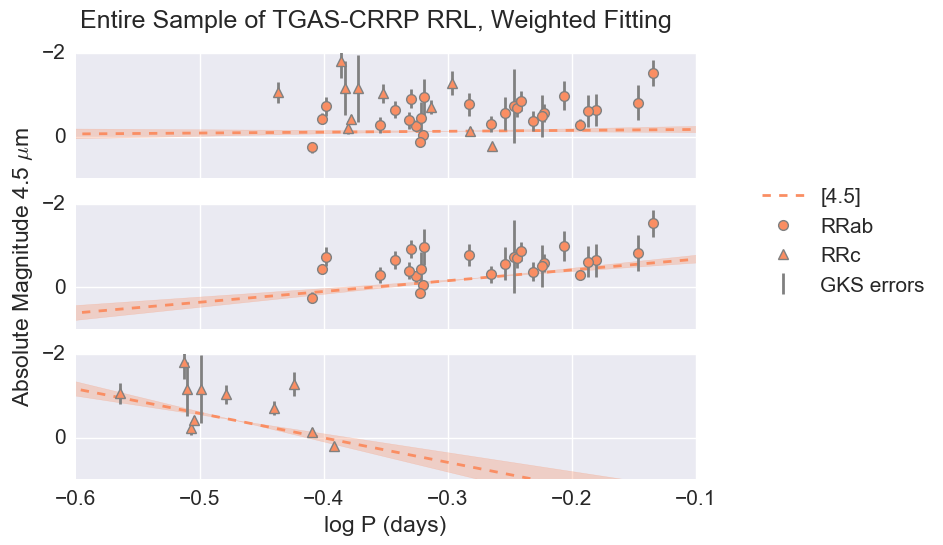

In [126]:
### Fit 4.5 in all variants


sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

## Whole sample, weighted fit, RRc fundamentalised


popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_4p5, sigma=analysis_df.e_M_4p5_gks, absolute_sigma=True)

fit_df_weighted = fit_df_weighted.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '4p5', 'sample' : 'weighted', 'n_stars': len(analysis_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)
col = next(palette)

axp1 = mp.subplot(311)
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -6.0)

axp1.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp1.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[4.5]", color=col)
axp1.errorbar(analysis_df.logP_f, analysis_df.M_4p5, yerr = analysis_df.e_M_4p5_gks, ls='None',zorder=4, color='Grey', label='GKS errors')
axp1.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_4p5'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
axp1.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_4p5'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

xticklabels = axp1.get_xticklabels()
mp.setp(xticklabels, visible=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, -0.5))
axp1.set_yticks([0, -2, -4, -6])



## whole sample, no cuts, RRab only

axp2 = mp.subplot(312, sharex=axp1, sharey=axp1)

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_4p5'], sigma=ab_df.e_M_4p5_gks, absolute_sigma=True)

fit_df_weighted = fit_df_weighted.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '4p5', 'sample' : 'weighted', 'n_stars': len(ab_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

axp2.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp2.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[4.5]", color=col)
axp2.errorbar(ab_df['log_P'], ab_df['M_4p5'], yerr = ab_df.e_M_4p5_gks, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp2.plot(ab_df.log_P, ab_df.M_4p5, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
mp.ylabel('Absolute Magnitude 4.5 $\mu$m')

xticklabels = axp2.get_xticklabels()
mp.setp(xticklabels, visible=False)
axp2.set_yticks([0, -2, -4, -6])

## whole sample, no cuts, RRc only

axp3 = mp.subplot(313, sharex=axp1, sharey=axp1)

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_4p5'], sigma=c_df.e_M_4p5_gks, absolute_sigma=True)

fit_df_weighted = fit_df_weighted.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '4p5', 'sample' : 'weighted', 'n_stars': len(c_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


axp3.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp3.plot(p1, slope*(p1-mean)+ zp, ls='--', label="_nolegend_", color=col)
axp3.errorbar(c_df['log_P'], c_df['M_4p5'], yerr = c_df.e_M_4p5_gks, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp3.plot(c_df.log_P, c_df.M_4p5, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
axp3.set_yticks([0, -2, -4, -6])


mp.xlabel('log P (days)')
mp.suptitle('Entire Sample of TGAS-CRRP RRL, Weighted Fitting')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.0)

mp.savefig('crrp_tgas_4p5um_weighted.pdf')

In [127]:
fit_df_weighted

slope   e_slope  zeropoint  e_zeropoint  mean_logp   source  type band  \
0 -0.448471  0.182942  -0.078414     0.000216  -0.296645  FreeFit  Fund  3p6   
1 -2.524522  0.249668  -0.164721     0.000606  -0.275153  FreeFit    ab  3p6   
2  5.419895  0.686133  -0.420510     0.002626  -0.476400  FreeFit     c  3p6   
3 -0.212688  0.192206  -0.129945     0.000363  -0.296645  FreeFit  Fund  4p5   
4 -2.574364  0.270638  -0.216528     0.000819  -0.275153  FreeFit    ab  4p5   
5  5.858023  0.672088  -0.440887     0.002837  -0.476400  FreeFit     c  4p5   

     sample  n_stars  
0  weighted     38.0  
1  weighted     27.0  
2  weighted     11.0  
3  weighted     38.0  
4  weighted     27.0  
5  weighted     11.0

In [128]:
min(analysis_df.e_M_3p6_gks), max(analysis_df.e_M_3p6_gks), np.mean(analysis_df.e_M_3p6_gks)

(0.012526709787872386, 0.86635099067262167, 0.27547719913370722)

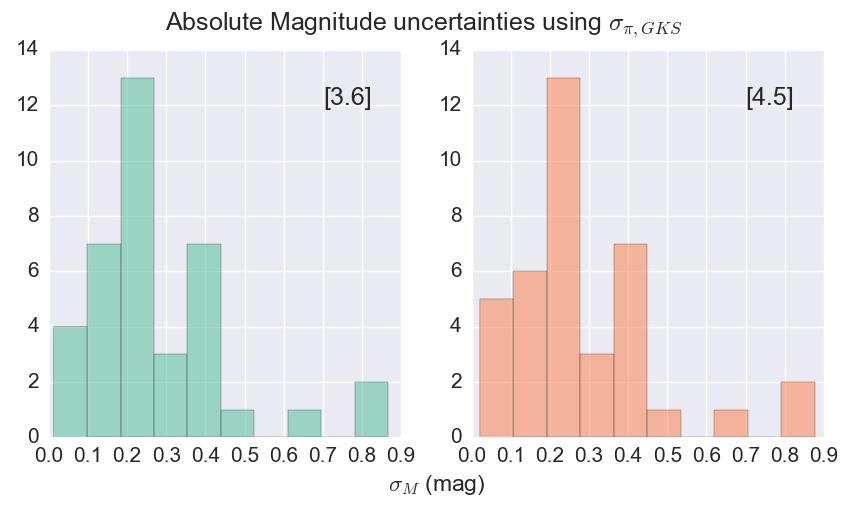

In [129]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
mp.xlabel('$\sigma_{M}$ (mag)')
axp1 = fig.add_subplot(121)
axp2 = fig.add_subplot(122)

axp1.hist(analysis_df.e_M_3p6_gks, color=next(palette), label='[3.6]', alpha=0.6)
axp2.hist(analysis_df.e_M_4p5_gks, color=next(palette), label='[4.5]', alpha=0.6)

axp1.annotate('[3.6]', xy=(0.7, 12), xycoords='data')
axp2.annotate('[4.5]', xy=(0.7, 12), xycoords='data')

mp.suptitle('Absolute Magnitude uncertainties using $\sigma_{\pi, GKS}$')
#mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))




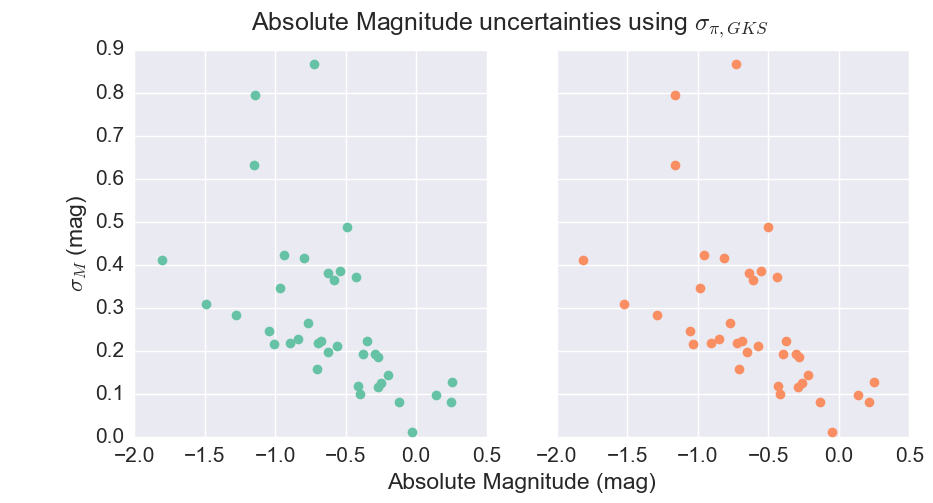

In [130]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
mp.ylabel('$\sigma_{M}$ (mag)')
mp.xlabel('Absolute Magnitude (mag)')
axp1 = fig.add_subplot(121)
axp2 = fig.add_subplot(122)

axp1.plot(analysis_df.M_3p6, analysis_df.e_M_3p6_gks, 'o', color=next(palette), label='[3.6]')

axp2.plot(analysis_df.M_4p5, analysis_df.e_M_3p6_gks, 'o', color=next(palette), label='[4.5]')

axp1.annotate('[3.6]', xy=(0.7, 12), xycoords='data')
axp2.annotate('[4.5]', xy=(0.7, 12), xycoords='data')
yticklabels = axp2.get_yticklabels()
mp.setp(yticklabels, visible=False)

mp.suptitle('Absolute Magnitude uncertainties using $\sigma_{\pi, GKS}$')
#mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))




## Uncertainty outliers

* Clear outliers in this figure - can use this to get rid of the ones that have bad parallax uncertainties 

* Fit the relation between absolute mag and sigma, sigma clip the results, to get a good sample.
* This doesn't depend on the PL relation, so not degenerate with sigma clipping there


For reference: using this fitting form

``` 
def free_fit(logp, slope, zp):
    av_p = np.mean(logp)
    return slope*(logp - av_p) + zp
```

`logp` is just a proxy for x, making sure that it's fitting around the mean value of x, not zero. returning the slope and zero point

# NOPE

* THIS IS A BAD IDEA

* Not going to throw away stars, going to MODEL them.

* Using emcee, following recipe from Hogg, Bovey & Lang (https://arxiv.org/pdf/1008.4686v1.pdf) and the emcee documentation (http://dan.iel.fm/emcee/current/user/line/)

In [131]:
# Define the probability function as likelihood * prior.
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [132]:
slope_guess = -1.0
zp_guess = -0.6
e_guess = 1.0

np.random.seed(123)

x = ab_df.log_P
y = ab_df.M_3p6
yerr = ab_df.e_M_3p6_gks


In [133]:
chi2 = lambda *args: -2 * lnlike(*args)
result = op.minimize(chi2, [slope_guess, zp_guess, np.log(e_guess)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]
print("""Maximum likelihood result:
    m = {0} (truth: {1})
    b = {2} (truth: {3})
    f = {4} (truth: {5})
""".format(m_ml, slope_guess, b_ml, zp_guess, np.exp(lnf_ml), e_guess))

Maximum likelihood result:
    m = -1.05561034387 (truth: -1.0)
    b = -0.754465614394 (truth: -0.6)
    f = 0.657900037089 (truth: 1.0)



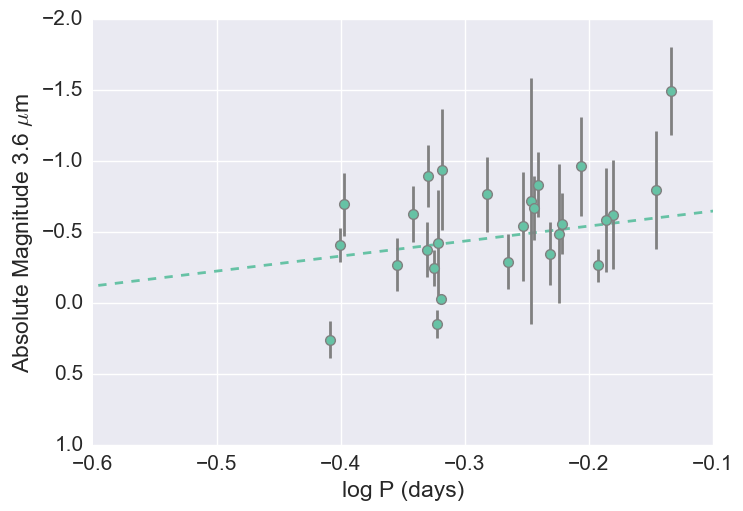

In [134]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

x1 = np.arange(-1,0.1,0.1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

mp.errorbar(x, y, yerr=yerr, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_3p6'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
#mp.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_3p6'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

mp.plot(x1, m_ml*x1+b_ml, ls='--', color=col)

mp.ylabel('Absolute Magnitude 3.6 $\mu$m')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.0)
mp.xlabel('log P (days)')


In [135]:
analysis_df.to_csv('analysis_rrl.csv', index=False, header=True, sep=' ', na_rep= 99.99)

# Extinction

* Large dispersion may be due to foreground extinction

* Can correct for this using dust maps

http://astroquery.readthedocs.io/en/latest/irsa/irsa_dust.html

In [232]:
analysis_df

Name  Period Type  mag_3p6  err_3p6  amp_3p6  mag_4p5  err_4p5  \
0     ABUma   0.600   ab    9.598    0.003    0.171    9.587    0.003   
1     AMTuc   0.406    c   10.602    0.002    0.127   10.565    0.002   
2     ANSer   0.522   ab    9.801    0.004    0.289    9.795    0.004   
3     AVPeg   0.390   ab    9.332    0.004    0.281    9.329    0.004   
4     BHPeg   0.641   ab    9.002    0.003    0.237    8.982    0.003   
5     BXLeo   0.363    c   10.678    0.002    0.107   10.670    0.002   
6     CSEri   0.311    c    8.126    0.002    0.117    8.110    0.002   
7     DXDel   0.473   ab    8.653    0.004    0.249    8.641    0.004   
8     HKPup   0.734   ab    9.884    0.004    0.252    9.854    0.004   
9     MTTel   0.317    c    8.078    0.002    0.126    8.064    0.002   
10    RRGem   0.397   ab   10.243    0.004    0.316   10.222    0.004   
11    RRLyr   0.567   ab    6.472    0.003    0.218    6.463    0.003   
12    RUPsc   0.390    c    9.085    0.002    0.116    9.072    0.002   
13    RvCrB   0.332    c   10.494    0.002    0.105   10.471    0.002   
14    RVUma   0.468   ab    9.760    0.004    0.326    9.746    0.004   
15    RXEri   0.587   ab    8.340    0.004    0.279    8.315    0.004   
16    RZCep   0.309    c    7.871    0.002    0.119    7.858    0.002   
17    STBoo   0.622   ab    9.842    0.005    0.348    9.823    0.005   
19    SUDra   0.660   ab    8.600    0.004    0.281    8.584    0.004   
20    SVEri   0.714   ab    8.568    0.003    0.209    8.551    0.003   
21    SVHya   0.479   ab    9.370    0.004    0.293    9.351    0.004   
22    SVScl   0.377    c   10.502    0.002    0.100   10.494    0.002   
23    SWAnd   0.442   ab    8.489    0.004    0.279    8.475    0.004   
24    SWDra   0.570   ab    9.306    0.004    0.257    9.288    0.004   
25    SXUma   0.307    c   10.077    0.002    0.107   10.066    0.002   
26    TTLyn   0.597   ab    8.587    0.003    0.221    8.574    0.003   
27    TUUma   0.558   ab    8.623    0.004    0.293    8.609    0.004   
28    TVBoo   0.313    c   10.198    0.002    0.133   10.181    0.002   
29    TWHer   0.400   ab   10.239    0.004    0.304   10.213    0.005   
30    UUVir   0.476   ab    9.492    0.004    0.308    9.483    0.004   
31    UVOct   0.543   ab    8.182    0.004    0.244    8.170    0.004   
33  V440Sgr   0.477   ab    9.040    0.004    0.322    9.023    0.004   
34    VXHer   0.455   ab    9.601    0.005    0.332    9.580    0.004   
35     VInd   0.480   ab    8.852    0.004    0.281    8.834    0.004   
36    WYAnt   0.574   ab    9.569    0.004    0.261    9.552    0.004   
37    XZCyg   0.467   ab    8.657    0.003    0.225    8.641    0.004   
38     XAri   0.651   ab    7.888    0.004    0.289    7.862    0.004   
39    YZCap   0.273    c   10.338    0.001    0.093   10.321    0.001   

    amp_4p5     RA_ICRS    ...       mu_dist  good_err     M_3p6     M_4p5  \
0     0.177  182.810685    ...     10.157585       1.0 -0.559585 -0.570585   
1     0.142   19.627973    ...     10.352905       1.0  0.249095  0.212095   
2     0.299  238.379390    ...     10.567546       1.0 -0.766546 -0.772546   
3     0.281  328.011708    ...      9.076543       1.0  0.255457  0.252457   
4     0.236  343.254215    ...      9.269360       1.0 -0.267360 -0.287360   
5     0.122  174.508478    ...     11.378621       1.0 -0.700621 -0.708621   
6     0.117   39.274539    ...      8.327731       1.0 -0.201731 -0.217731   
7     0.258  311.868205    ...      8.899460       1.0 -0.246460 -0.258460   
8     0.257  116.195095    ...     11.378621       1.0 -1.494621 -1.524621   
9     0.111  285.550322    ...      9.223320       1.0 -1.145320 -1.159320   
10    0.313  110.389028    ...     10.653841       1.0 -0.410841 -0.431841   
11    0.213  291.365682    ...      7.194493       1.0 -0.722493 -0.731493   
12    0.110   18.608921    ...      9.208188       1.0 -0.123188 -0.136188   
13    0.120  244.857603    ...     11.505150       1.0 -1.011150 -1

In [137]:
analysis_df.ix[0]

Name               ABUma
Period               0.6
Type                  ab
mag_3p6            9.598
err_3p6            0.003
amp_3p6            0.171
mag_4p5            9.587
err_4p5            0.003
amp_4p5            0.177
RA_ICRS          182.811
DE_ICRS          47.8288
Plx                 0.93
e_Plx               0.27
e_gks           0.188406
distance_pc      1075.27
mu_dist          10.1576
good_err               1
A_v                  NaN
A_3p6                NaN
A_4p5                NaN
M_3p6          -0.559585
M_4p5          -0.570585
e_M_3p6_gks     0.212911
e_M_4p5_gks     0.217097
e_M_3p6_tgas    0.305118
e_M_4p5_tgas    0.311115
log_P          -0.221849
logP_f         -0.221849
Name: 0, dtype: object

In [138]:
ra = analysis_df.ix[0].RA_ICRS
dec = analysis_df.ix[0].DE_ICRS
coord_string = str(ra) + 'd ' +  str(dec) + 'd'
C = coord.SkyCoord(coord_string, frame='fk5')

In [139]:
table = IrsaDust.get_extinction_table(C)

In [140]:
table

<Table length=25>
Filter_name  LamEff A_over_E_B_V_SandF A_SandF A_over_E_B_V_SFD  A_SFD 
            microns                      mags                     mags 
    str8    float64      float64       float64     float64      float64
----------- ------- ------------------ ------- ---------------- -------
     CTIO U  0.3734              4.107   0.108            4.968    0.13
     CTIO B  0.4309              3.641   0.095            4.325   0.113
     CTIO V  0.5517              2.682    0.07             3.24   0.085
     CTIO R   0.652              2.119   0.056            2.634   0.069
     CTIO I  0.8007              1.516    0.04            1.962   0.051
   DSS-II g  0.4621              3.381   0.089            3.907   0.102
   DSS-II r  0.6546              2.088   0.055            2.649   0.069
   DSS-II i  0.8111              1.487   0.039            1.893    0.05
     SDSS u  0.3587              4.239   0.111            5.155   0.135
        ...     ...                ...     ...              ...     ...
    UKIRT K    2.19              0.302   0.008            0.367    0.01
    2MASS J    1.23              0.723   0.019            0.937   0.025
    2MASS H    1.64               0.46   0.012            0.591   0.015
   2MASS Ks    2.16               0.31   0.008            0.382    0.01
     IRAC-1    3.52              0.178   0.005             0.22   0.006
     IRAC-2    4.46              0.148   0.004            0.183   0.005
     IRAC-3    5.66               0.13   0.003            0.162   0.004
     IRAC-4    7.68              0.122   0.003            0.151   0.004
     WISE-1    3.32              0.189   0.005            0.234   0.006
     WISE-2    4.57              0.146   0.004             0.18   0.005

# Uncertainties on extinction

* IRSA dust service provides both Schlegel, Finkbeiner & Davis (1998) and Schlafly & Finkbeiner (2011) results in the table. 

* I will adopt the S&F (2011) values for this work.

* Systematic uncertainties in their work approx 0.02 mag. Statistical on the order of millimag. Need to read the paper in more detail.



In [233]:
def grab_extinction(row):
    star = row.Name
    #print star
    ra = row.RA_ICRS
    #print ra
    dec = row.DE_ICRS
    #print dec
    coord_string = str(ra) + 'd ' +  str(dec) + 'd'
    #print coord_string
    C = coord.SkyCoord(coord_string, frame='fk5')
    #print C
    table = IrsaDust.get_extinction_table(C)
    #print table
    irac_1_sandf = table[19][3]
    irac_2_sandf = table[20][3]
    #print irac_1_sandf, irac_2_sandf
    analysis_df.ix[analysis_df.Name==star, 'A_3p6'] = irac_1_sandf
    analysis_df.ix[analysis_df.Name==star, 'A_4p5'] = irac_2_sandf

    

In [142]:
table[19], table[20]

(<Row index=19>
 Filter_name  LamEff A_over_E_B_V_SandF A_SandF A_over_E_B_V_SFD  A_SFD 
             microns                      mags                     mags 
     str8    float64      float64       float64     float64      float64
 ----------- ------- ------------------ ------- ---------------- -------
      IRAC-1    3.52              0.178   0.005             0.22   0.006,
 <Row index=20>
 Filter_name  LamEff A_over_E_B_V_SandF A_SandF A_over_E_B_V_SFD  A_SFD 
             microns                      mags                     mags 
     str8    float64      float64       float64     float64      float64
 ----------- ------- ------------------ ------- ---------------- -------
      IRAC-2    4.46              0.148   0.004            0.183   0.005)

In [234]:
analysis_df.apply(lambda line: grab_extinction(line), axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
dtype: object

In [235]:
analysis_df

Name  Period Type  mag_3p6  err_3p6  amp_3p6  mag_4p5  err_4p5  \
0     ABUma   0.600   ab    9.598    0.003    0.171    9.587    0.003   
1     AMTuc   0.406    c   10.602    0.002    0.127   10.565    0.002   
2     ANSer   0.522   ab    9.801    0.004    0.289    9.795    0.004   
3     AVPeg   0.390   ab    9.332    0.004    0.281    9.329    0.004   
4     BHPeg   0.641   ab    9.002    0.003    0.237    8.982    0.003   
5     BXLeo   0.363    c   10.678    0.002    0.107   10.670    0.002   
6     CSEri   0.311    c    8.126    0.002    0.117    8.110    0.002   
7     DXDel   0.473   ab    8.653    0.004    0.249    8.641    0.004   
8     HKPup   0.734   ab    9.884    0.004    0.252    9.854    0.004   
9     MTTel   0.317    c    8.078    0.002    0.126    8.064    0.002   
10    RRGem   0.397   ab   10.243    0.004    0.316   10.222    0.004   
11    RRLyr   0.567   ab    6.472    0.003    0.218    6.463    0.003   
12    RUPsc   0.390    c    9.085    0.002    0.116    9.072    0.002   
13    RvCrB   0.332    c   10.494    0.002    0.105   10.471    0.002   
14    RVUma   0.468   ab    9.760    0.004    0.326    9.746    0.004   
15    RXEri   0.587   ab    8.340    0.004    0.279    8.315    0.004   
16    RZCep   0.309    c    7.871    0.002    0.119    7.858    0.002   
17    STBoo   0.622   ab    9.842    0.005    0.348    9.823    0.005   
19    SUDra   0.660   ab    8.600    0.004    0.281    8.584    0.004   
20    SVEri   0.714   ab    8.568    0.003    0.209    8.551    0.003   
21    SVHya   0.479   ab    9.370    0.004    0.293    9.351    0.004   
22    SVScl   0.377    c   10.502    0.002    0.100   10.494    0.002   
23    SWAnd   0.442   ab    8.489    0.004    0.279    8.475    0.004   
24    SWDra   0.570   ab    9.306    0.004    0.257    9.288    0.004   
25    SXUma   0.307    c   10.077    0.002    0.107   10.066    0.002   
26    TTLyn   0.597   ab    8.587    0.003    0.221    8.574    0.003   
27    TUUma   0.558   ab    8.623    0.004    0.293    8.609    0.004   
28    TVBoo   0.313    c   10.198    0.002    0.133   10.181    0.002   
29    TWHer   0.400   ab   10.239    0.004    0.304   10.213    0.005   
30    UUVir   0.476   ab    9.492    0.004    0.308    9.483    0.004   
31    UVOct   0.543   ab    8.182    0.004    0.244    8.170    0.004   
33  V440Sgr   0.477   ab    9.040    0.004    0.322    9.023    0.004   
34    VXHer   0.455   ab    9.601    0.005    0.332    9.580    0.004   
35     VInd   0.480   ab    8.852    0.004    0.281    8.834    0.004   
36    WYAnt   0.574   ab    9.569    0.004    0.261    9.552    0.004   
37    XZCyg   0.467   ab    8.657    0.003    0.225    8.641    0.004   
38     XAri   0.651   ab    7.888    0.004    0.289    7.862    0.004   
39    YZCap   0.273    c   10.338    0.001    0.093   10.321    0.001   

    amp_4p5     RA_ICRS  ...       M_3p6     M_4p5  e_M_3p6_gks e_M_4p5_gks  \
0     0.177  182.810685  ...   -0.559585 -0.570585     0.212911    0.217097   
1     0.142   19.627973  ...    0.249095  0.212095     0.082488    0.070236   
2     0.299  238.379390  ...   -0.766546 -0.772546     0.264187    0.266255   
3     0.281  328.011708  ...    0.255457  0.252457     0.128756    0.127244   
4     0.236  343.254215  ...   -0.267360 -0.287360     0.115538    0.124181   
5     0.122  174.508478  ...   -0.700621 -0.708621     0.159093    0.160910   
6     0.117   39.274539  ...   -0.201731 -0.217731     0.143544    0.154929   
7     0.258  311.868205  ...   -0.246460 -0.258460     0.126285    0.132434   
8     0.257  116.195095  ...   -1.494621 -1.524621     0.308615    0.314809   
9     0.111  285.550322  ...   -1.145320 -1.159320     0.795056    0.804775   
10    0.313  110.389028  ...   -0.410841 -0.431841     0.118445    0.124499   
11    0.213  291.365682  ...   -0.722493 -0.731493     0.866351    0.877143   
12    0.110   18.608921  ...   -0.123188 -0.136188     0.082767    0.091502   
13    0.120  244.857603  ...   -1.011150 -1.034150   

In [236]:
min(analysis_df.A_3p6), max(analysis_df.A_3p6)

(0.002, 0.187)

In [237]:
analysis_df['M_3p6'] = analysis_df.mag_3p6 - analysis_df.mu_dist - analysis_df.A_3p6
analysis_df['M_4p5'] = analysis_df.mag_4p5 - analysis_df.mu_dist - analysis_df.A_4p5


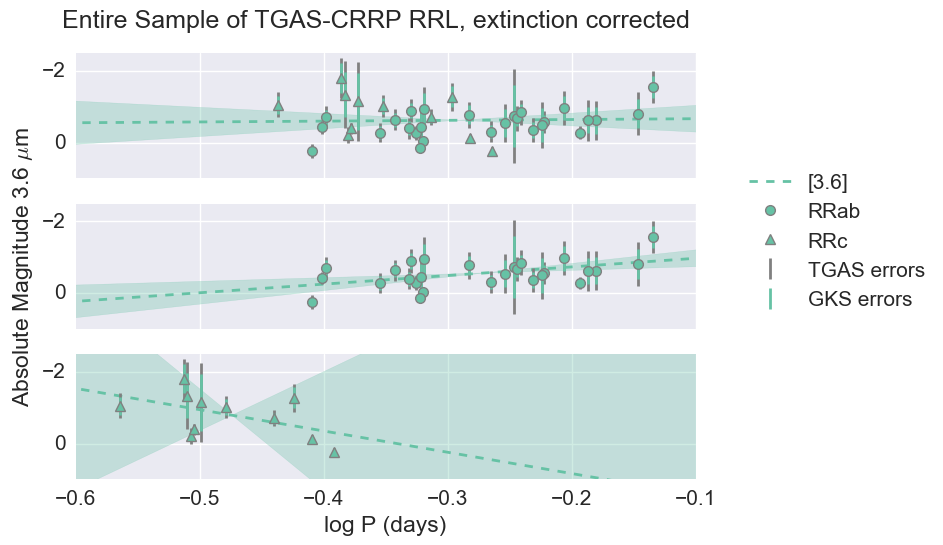

In [238]:
### Fit 3.6 in all variants

columns = ['slope', 'e_slope', 'zeropoint', 'e_zeropoint', 'mean_logp', 'source', 'type', 'band', 'sample', 'n_stars']

fit_df_final = pd.DataFrame(columns=columns)

p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

## Whole sample, no cuts, RRc fundamentalised

popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_3p6)

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(analysis_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)

axp1 = mp.subplot(311)
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -6.0)

axp1.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp1.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp1.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
axp1.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
axp1.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_3p6'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
axp1.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_3p6'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

xticklabels = axp1.get_xticklabels()
mp.setp(xticklabels, visible=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, -0.5))
axp1.set_yticks([0, -2, -4, -6])



## whole sample, no cuts, RRab only

axp2 = mp.subplot(312, sharex=axp1, sharey=axp1)

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_3p6'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(ab_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

axp2.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp2.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp2.errorbar(ab_df['log_P'], ab_df['M_3p6'], yerr = ab_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp2.errorbar(ab_df.log_P, ab_df.M_3p6, yerr = ab_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp2.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
mp.ylabel('Absolute Magnitude 3.6 $\mu$m')

xticklabels = axp2.get_xticklabels()
mp.setp(xticklabels, visible=False)
axp2.set_yticks([0, -2, -4, -6])

## whole sample, no cuts, RRc only

axp3 = mp.subplot(313, sharex=axp1, sharey=axp1)

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_3p6'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(c_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


axp3.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp3.plot(p1, slope*(p1-mean)+ zp, ls='--', label="_nolegend_", color=col)
axp3.errorbar(c_df['log_P'], c_df['M_3p6'], yerr = c_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp3.errorbar(c_df.log_P, c_df.M_3p6, yerr = c_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp3.plot(c_df.log_P, c_df.M_3p6, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
axp3.set_yticks([0, -2, -4, -6])


mp.xlabel('log P (days)')
mp.suptitle('Entire Sample of TGAS-CRRP RRL, extinction corrected')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.savefig('crrp_tgas_3p6um_ext_corr.pdf')

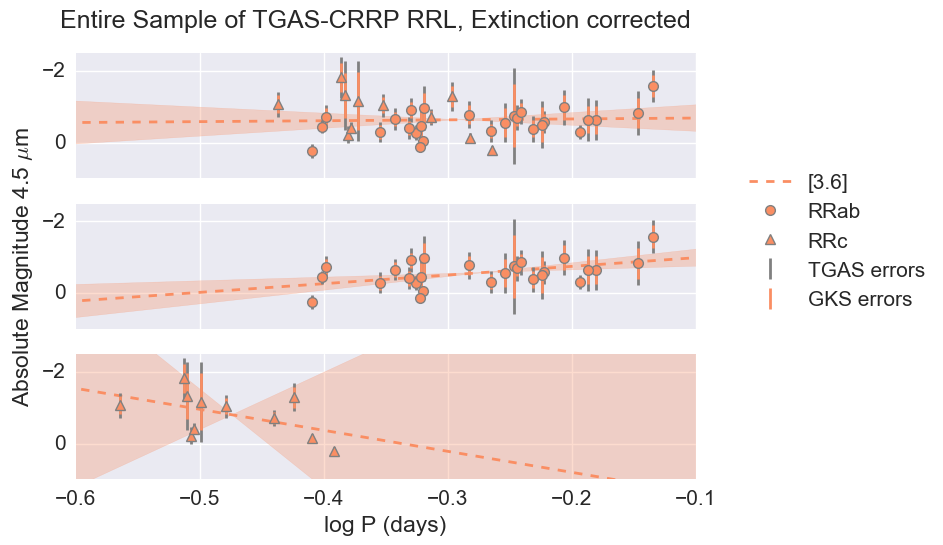

In [239]:
### Fit 4.5 in all variants

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())

## Whole sample, no cuts, RRc fundamentalised

popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_4p5)

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(analysis_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)
col = next(palette)


axp1 = mp.subplot(311)
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -6.0)

axp1.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp1.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp1.errorbar(analysis_df.logP_f, analysis_df.M_4p5, yerr = analysis_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
axp1.errorbar(analysis_df.logP_f, analysis_df.M_4p5, yerr = analysis_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='GKS errors')
axp1.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_4p5'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
axp1.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_4p5'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

xticklabels = axp1.get_xticklabels()
mp.setp(xticklabels, visible=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, -0.5))
axp1.set_yticks([0, -2, -4, -6])



## whole sample, no cuts, RRab only

axp2 = mp.subplot(312, sharex=axp1, sharey=axp1)

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_4p5'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(ab_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

axp2.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp2.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp2.errorbar(ab_df['log_P'], ab_df['M_4p5'], yerr = ab_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp2.errorbar(ab_df.log_P, ab_df.M_4p5, yerr = ab_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp2.plot(ab_df.log_P, ab_df.M_4p5, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
mp.ylabel('Absolute Magnitude 4.5 $\mu$m')

xticklabels = axp2.get_xticklabels()
mp.setp(xticklabels, visible=False)
axp2.set_yticks([0, -2, -4, -6])

## whole sample, no cuts, RRc only

axp3 = mp.subplot(313, sharex=axp1, sharey=axp1)

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_4p5'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '4p5', 'sample' : 'complete', 'n_stars': len(c_df['M_4p5']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


axp3.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp3.plot(p1, slope*(p1-mean)+ zp, ls='--', label="_nolegend_", color=col)
axp3.errorbar(c_df['log_P'], c_df['M_4p5'], yerr = c_df.e_M_4p5_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp3.errorbar(c_df.log_P, c_df.M_4p5, yerr = c_df.e_M_4p5_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp3.plot(c_df.log_P, c_df.M_4p5, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
axp3.set_yticks([0, -2, -4, -6])


mp.xlabel('log P (days)')
mp.suptitle('Entire Sample of TGAS-CRRP RRL, Extinction corrected')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)


mp.savefig('crrp_tgas_4p5um_ext_corr.pdf')

# emcee fitting assuming straight line with intrinsic scatter

* Follwing vanderplas tutorial on emcee fitting of data with intrinsic scatter
* Bayesian Astronomy tutorial
https://github.com/jakevdp/BayesianAstronomy
* tutorial 3



In [159]:
def log_prior(theta):
    if theta[2] <= 0 or np.any(np.abs(theta[:2]) > 1000):   ##### first part of this is the case where there is no scatter
        return -np.inf  # log(0)
    else:
        # Jeffreys Prior
        return -np.log(theta[2])
    
def log_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1] * x
    S = dy ** 2 + theta[2] ** 2
    return -0.5 * np.sum(np.log(2 * np.pi * S) +
                         (y - y_model) ** 2 / S)

def log_posterior(theta, x, y, dy):
    return log_prior(theta) + log_likelihood(theta, x, y, dy)

In [160]:
x = ab_df.log_P
y = ab_df.M_3p6
dy = ab_df.e_M_3p6_gks

ndim = 3  # number of parameters in the model -- intrinsic scatter is now an extra parameter
nwalkers = 50  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=[x, y, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 200)

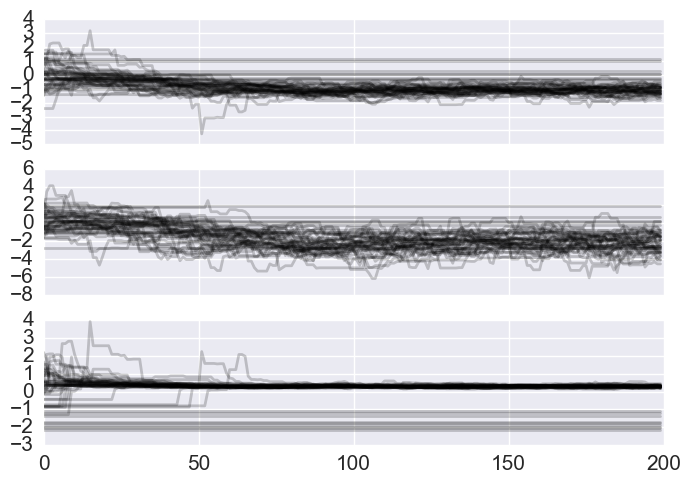

In [162]:
fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);


In [163]:
# Are your chains stabilized? Reset them and get a clean sample
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)


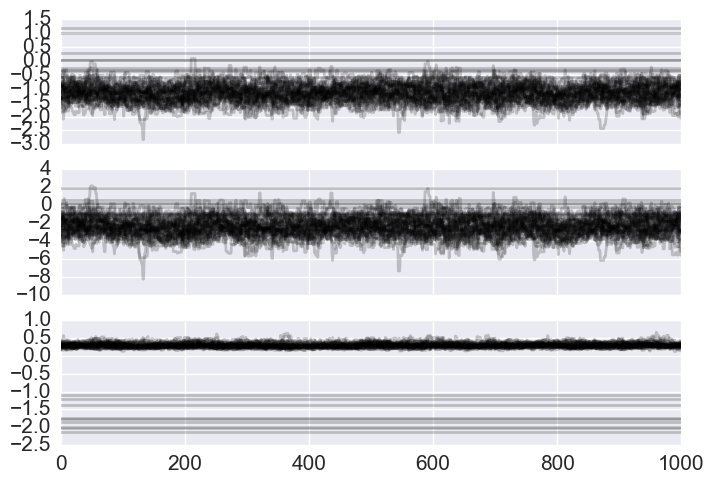

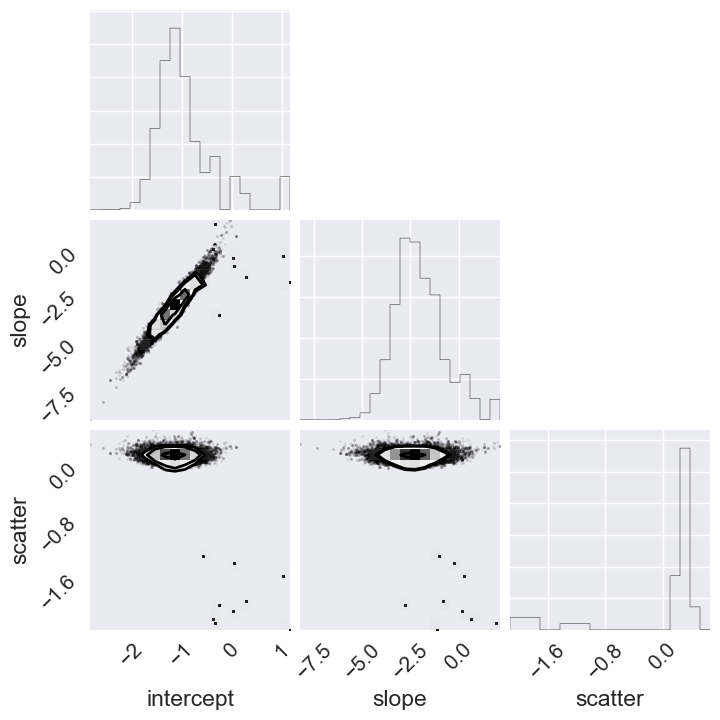

In [165]:
# Use corner.py to visualize the three-dimensional posterior
fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);

corner.corner(sampler.flatchain, labels=['intercept', 'slope', 'scatter']);

slope =  -2.0210135895 zeropoint =  -0.930121589194 instrinsic scatter =  -0.066404290873
standard deviations:  1.31502165683 0.609341726243 0.774475291108


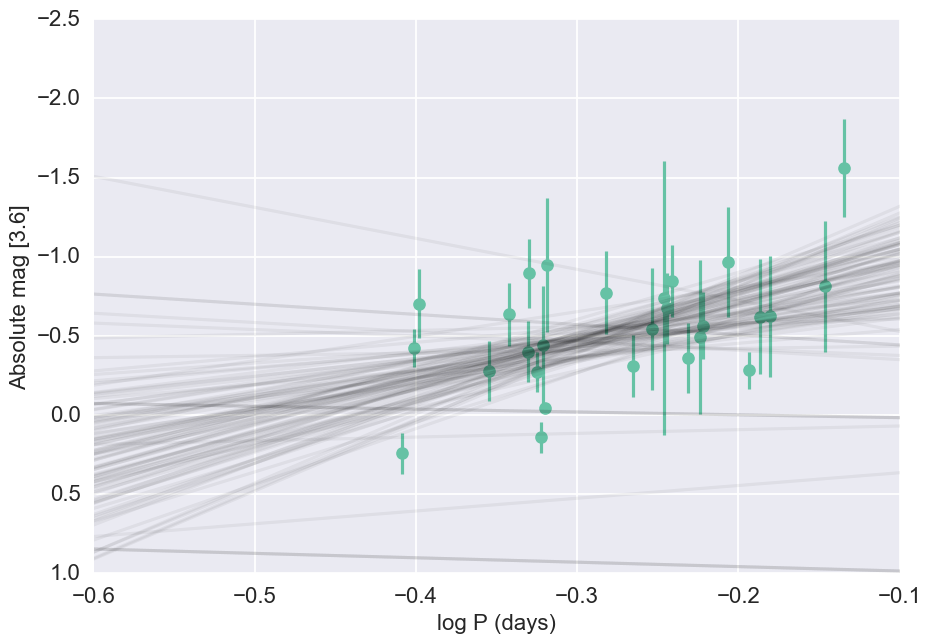

In [178]:
# Next plot ~100 of the samples as models over the data to get an idea of the fit

chain = sampler.flatchain

mp.errorbar(x, y, dy, fmt='o');

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 200)]

xfit = np.arange(-1,0.1,0.1)
for i in range(100):
    theta = thetas[i]
    mp.plot(xfit, theta[0] + theta[1] * xfit,
             color='black', alpha=0.05);
    
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.xlabel('log P (days)')
mp.ylabel('Absolute mag [3.6]')

theta_best = chain.mean(0)
theta_std = chain.std(0)


print 'slope = ', theta_best[1], 'zeropoint = ', theta_best[0], 'instrinsic scatter = ', theta_best[2]

print 'standard deviations: ', theta_std[1], theta_std[0], theta_std[2]

## negative intrinsic scatter?

* Getting weird results for the intrinsic scatter - negative values?
* Try the simple case of assuming scatter is due to measurement uncertainty until I really understand the process

In [179]:
def log_prior(theta):
    if np.all(np.abs(theta) < 1000):
        return 0
    else:
        return -np.inf  # log(0)
    
def log_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1] * x
    return -0.5 * np.sum(np.log(2 * np.pi * dy ** 2) +
                         (y - y_model) ** 2 / dy ** 2)

def log_posterior(theta, x, y, dy):
    return log_prior(theta) + log_likelihood(theta, x, y, dy)

In [190]:
ndim = 2  # number of parameters in the model
nwalkers = 100  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=[x, y, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 200)

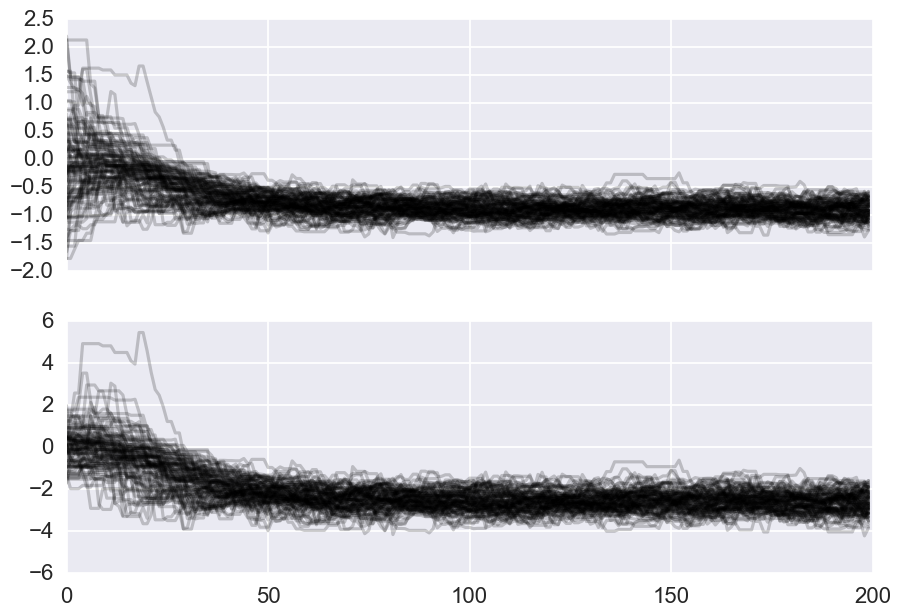

In [191]:
fig, ax = mp.subplots(2, sharex=True)
for i in range(2):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);

In [192]:
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

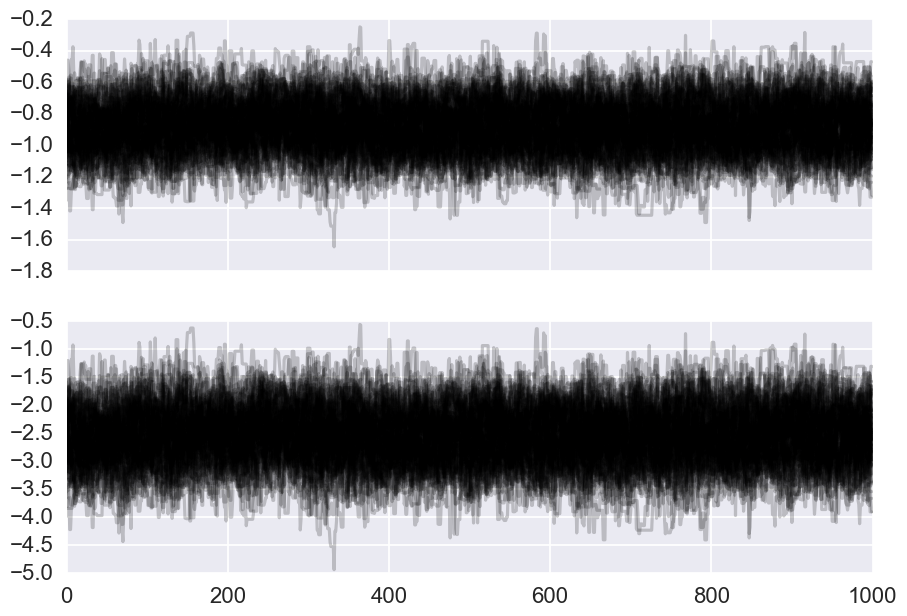

In [193]:
fig, ax = mp.subplots(2, sharex=True)
for i in range(2):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);

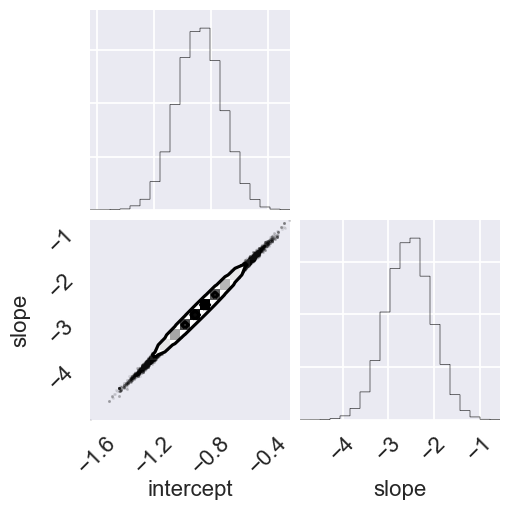

In [194]:
corner.corner(sampler.flatchain, labels=['intercept', 'slope']);

slope =  -2.54226843583 zeropoint =  -0.879853852565
standard deviations:  0.500064874821 0.159679715211


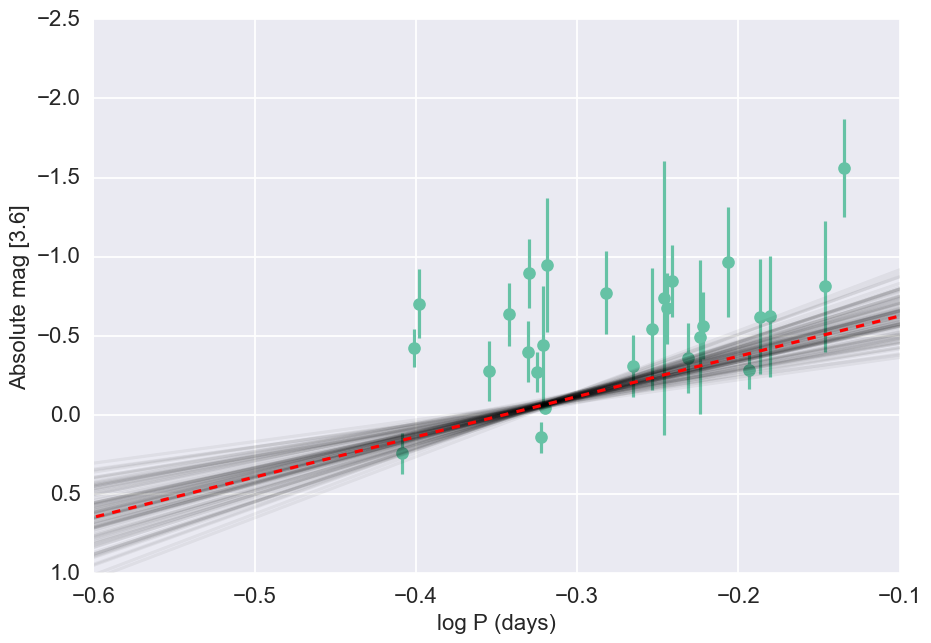

In [197]:
chain = sampler.flatchain

mp.errorbar(x, y, dy, fmt='o');

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]

xfit = np.arange(-1,0,0.1)
for i in range(100):
    theta = thetas[i]
    mp.plot(xfit, theta[0] + theta[1] * xfit,
             color='black', alpha=0.05);
    
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.xlabel('log P (days)')
mp.ylabel('Absolute mag [3.6]')

theta_best = chain.mean(0)
theta_std = chain.std(0)

mp.plot(xfit, theta_best[0] + theta_best[1]*xfit, 'r--')


print 'slope = ', theta_best[1], 'zeropoint = ', theta_best[0]

print 'standard deviations: ', theta_std[1], theta_std[0]

So now it's getting the right slope? But the it's just fitting to the points with the tiny error bars


In [198]:
def log_prior(theta):
    if theta[2] <= 0 or np.any(np.abs(theta[:2]) > 10):   ##### making limit on theta smaller so they're reasonable
        return -np.inf  # log(0)
    else:
        # Jeffreys Prior
        return -np.log(theta[2])
    
def log_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1] * x
    S = dy ** 2 + theta[2] ** 2
    return -0.5 * np.sum(np.log(2 * np.pi * S) +
                         (y - y_model) ** 2 / S)

def log_posterior(theta, x, y, dy):
    return log_prior(theta) + log_likelihood(theta, x, y, dy)

In [203]:
ndim = 3  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)
starting_guesses[:, 2] = np.random.rand(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=[x, y, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 200)

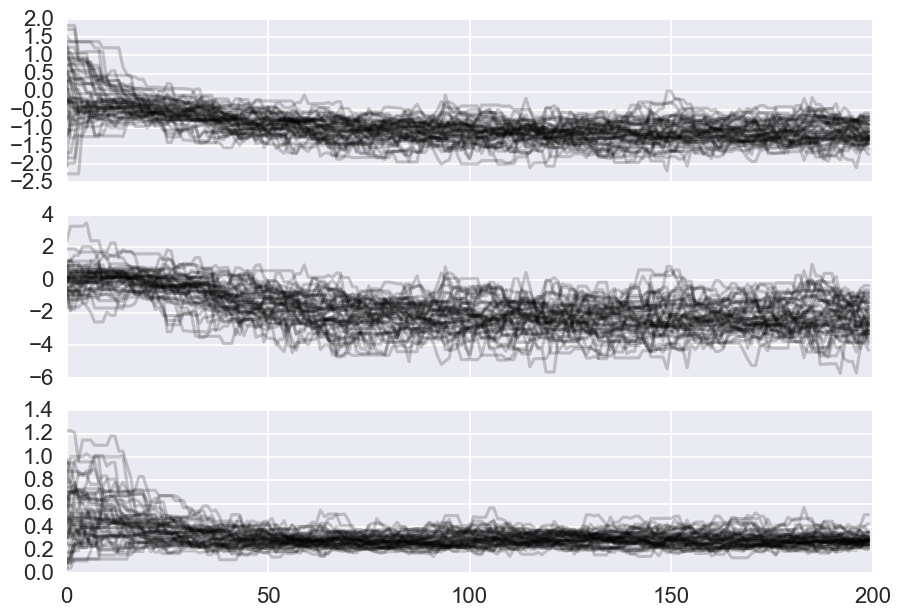

In [204]:
# Plot the three chains as above

fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);

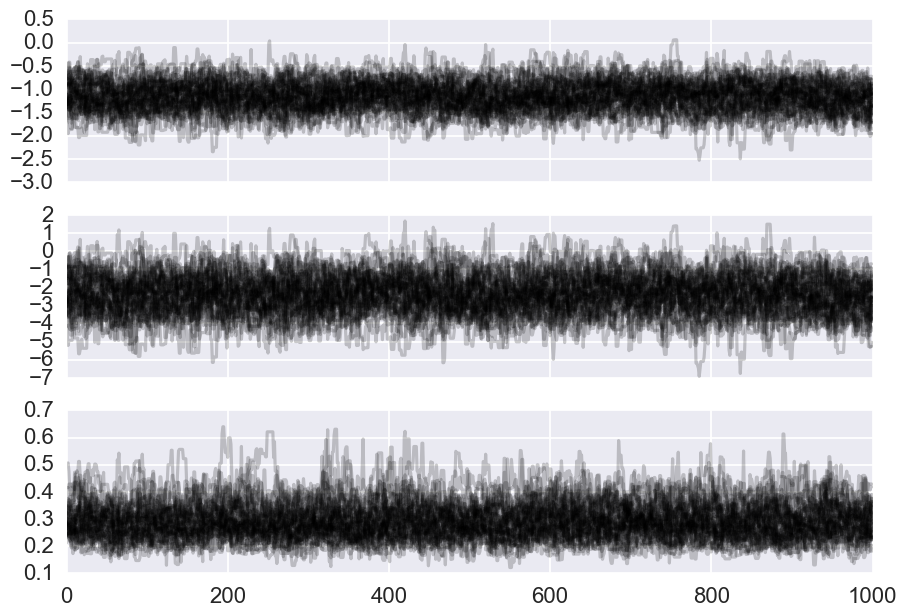

In [206]:
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);

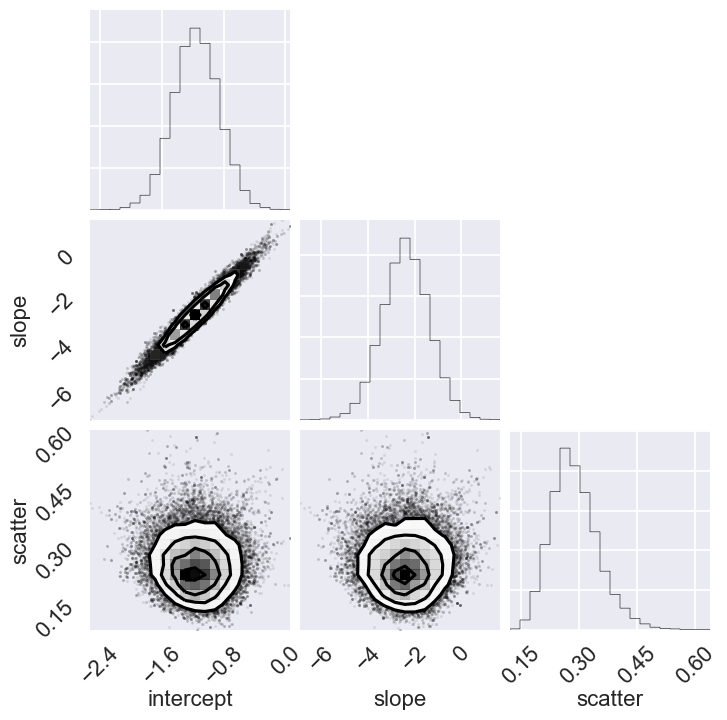

In [208]:
# Use corner.py to visualize the three-dimensional posterior
corner.corner(sampler.flatchain, labels=['intercept', 'slope', 'scatter']);

slope =  -2.38807293168 zeropoint =  -1.15549874957 scatter =  0.290004266797
standard deviations:  1.00539309794 0.299427204839 0.0621703187993


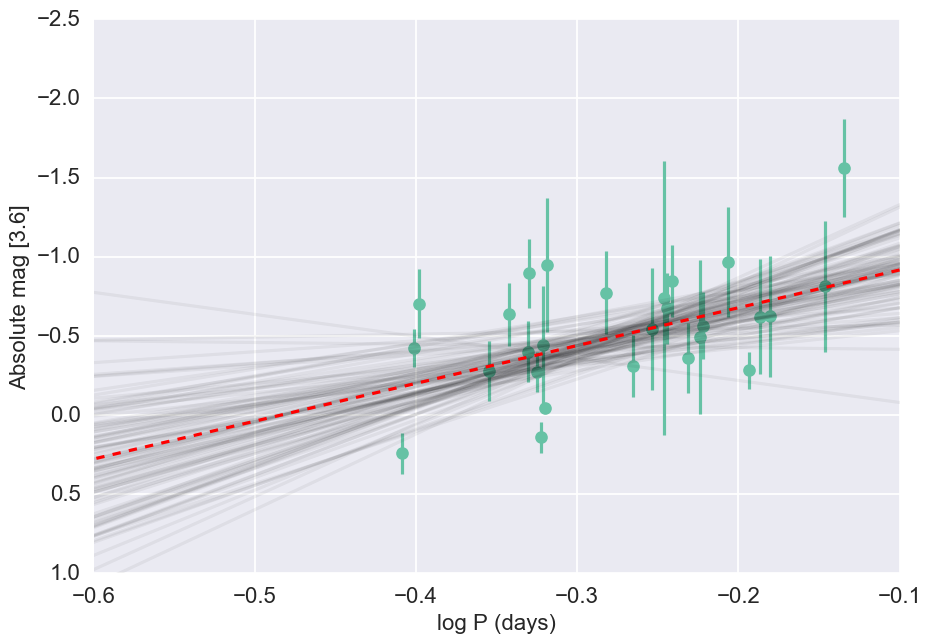

In [211]:
chain = sampler.flatchain

mp.errorbar(x, y, dy, fmt='o');

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]

xfit = np.arange(-1, 0, 0.1)
for i in range(100):
    theta = thetas[i]
    mp.plot(xfit, theta[0] + theta[1] * xfit,
             color='black', alpha=0.05);
    
    
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.xlabel('log P (days)')
mp.ylabel('Absolute mag [3.6]')

theta_best = chain.mean(0)
theta_std = chain.std(0)

mp.plot(xfit, theta_best[0] + theta_best[1]*xfit, 'r--')


print 'slope = ', theta_best[1], 'zeropoint = ', theta_best[0], 'scatter = ', theta_best[2]

print 'standard deviations: ', theta_std[1], theta_std[0], theta_std[2]

In [ ]:
## Repeat analysis for 4.5um

x = ab_df.log_P
y = ab_df.M_4p5
dy = ab_df.e_M_4p5_gks

ndim = 3  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)
starting_guesses[:, 2] = np.random.rand(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=[x, y, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 200)

# Plot the three chains as above

fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
    
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
    
# Use corner.py to visualize the three-dimensional posterior
corner.corner(sampler.flatchain, labels=['intercept', 'slope', 'scatter']);

chain = sampler.flatchain

slope =  -2.50723788683 zeropoint =  -1.20319918069 scatter =  0.29130653554
standard deviations:  0.982299992658 0.295290067506 0.062712124986


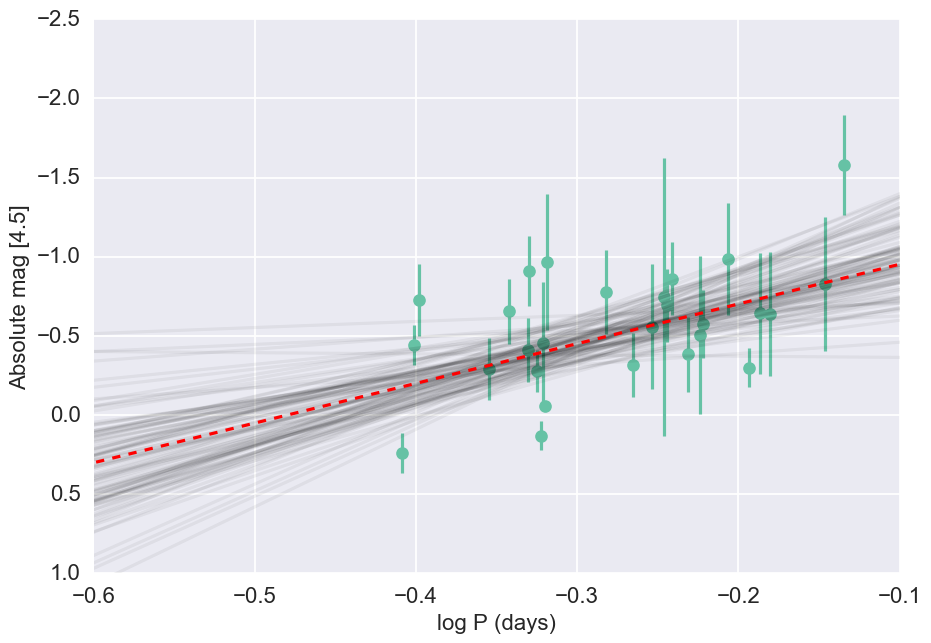

In [214]:
mp.clf()
mp.errorbar(x, y, dy, fmt='o');

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]

xfit = np.arange(-1, 0, 0.1)
for i in range(100):
    theta = thetas[i]
    mp.plot(xfit, theta[0] + theta[1] * xfit,
             color='black', alpha=0.05);
    
    
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.xlabel('log P (days)')
mp.ylabel('Absolute mag [4.5]')

theta_best = chain.mean(0)
theta_std = chain.std(0)

mp.plot(xfit, theta_best[0] + theta_best[1]*xfit, 'r--')


print 'slope = ', theta_best[1], 'zeropoint = ', theta_best[0], 'scatter = ', theta_best[2]

print 'standard deviations: ', theta_std[1], theta_std[0], theta_std[2]

In [240]:
feast_df = pd.read_csv('Feast_2008.tsv', sep=';', skiprows=64, names=('HIP', 'Name', 'plx', 'e_plx', 'Vmag', 'Jmag', 'Hmag', 'Ksmag', 'Per', '[Fe/H]', 'E(B-V)', 'Type', 'Simbad', '_RA', '_DE'))

feast_df['id_compare'] = map(str.lower, feast_df.Name)
feast_df['id_compare'] = feast_df['id_compare'].replace(regex=True, to_replace=r' ',value='')


In [241]:
feast_metals = ['id_compare', '[Fe/H]']

Name  Period Type  mag_3p6  err_3p6  amp_3p6  mag_4p5  err_4p5  \
0     ABUma   0.600   ab    9.598    0.003    0.171    9.587    0.003   
1     AMTuc   0.406    c   10.602    0.002    0.127   10.565    0.002   
2     ANSer   0.522   ab    9.801    0.004    0.289    9.795    0.004   
3     AVPeg   0.390   ab    9.332    0.004    0.281    9.329    0.004   
4     BHPeg   0.641   ab    9.002    0.003    0.237    8.982    0.003   
5     BXLeo   0.363    c   10.678    0.002    0.107   10.670    0.002   
6     CSEri   0.311    c    8.126    0.002    0.117    8.110    0.002   
7     DXDel   0.473   ab    8.653    0.004    0.249    8.641    0.004   
8     HKPup   0.734   ab    9.884    0.004    0.252    9.854    0.004   
9     MTTel   0.317    c    8.078    0.002    0.126    8.064    0.002   
10    RRGem   0.397   ab   10.243    0.004    0.316   10.222    0.004   
11    RRLyr   0.567   ab    6.472    0.003    0.218    6.463    0.003   
12    RUPsc   0.390    c    9.085    0.002    0.116    9.072    0.002   
13    RvCrB   0.332    c   10.494    0.002    0.105   10.471    0.002   
14    RVUma   0.468   ab    9.760    0.004    0.326    9.746    0.004   
15    RXEri   0.587   ab    8.340    0.004    0.279    8.315    0.004   
16    RZCep   0.309    c    7.871    0.002    0.119    7.858    0.002   
17    STBoo   0.622   ab    9.842    0.005    0.348    9.823    0.005   
18    SUDra   0.660   ab    8.600    0.004    0.281    8.584    0.004   
19    SVEri   0.714   ab    8.568    0.003    0.209    8.551    0.003   
20    SVHya   0.479   ab    9.370    0.004    0.293    9.351    0.004   
21    SVScl   0.377    c   10.502    0.002    0.100   10.494    0.002   
22    SWAnd   0.442   ab    8.489    0.004    0.279    8.475    0.004   
23    SWDra   0.570   ab    9.306    0.004    0.257    9.288    0.004   
24    SXUma   0.307    c   10.077    0.002    0.107   10.066    0.002   
25    TTLyn   0.597   ab    8.587    0.003    0.221    8.574    0.003   
26    TUUma   0.558   ab    8.623    0.004    0.293    8.609    0.004   
27    TVBoo   0.313    c   10.198    0.002    0.133   10.181    0.002   
28    TWHer   0.400   ab   10.239    0.004    0.304   10.213    0.005   
29    UUVir   0.476   ab    9.492    0.004    0.308    9.483    0.004   
30    UVOct   0.543   ab    8.182    0.004    0.244    8.170    0.004   
31  V440Sgr   0.477   ab    9.040    0.004    0.322    9.023    0.004   
32    VXHer   0.455   ab    9.601    0.005    0.332    9.580    0.004   
33     VInd   0.480   ab    8.852    0.004    0.281    8.834    0.004   
34    WYAnt   0.574   ab    9.569    0.004    0.261    9.552    0.004   
35    XZCyg   0.467   ab    8.657    0.003    0.225    8.641    0.004   
36     XAri   0.651   ab    7.888    0.004    0.289    7.862    0.004   
37    YZCap   0.273    c   10.338    0.001    0.093   10.321    0.001   

    amp_4p5     RA_ICRS   ...       M_4p5  e_M_3p6_gks  e_M_4p5_gks  \
0     0.177  182.810685   ...   -0.574585     0.212911     0.217097   
1     0.142   19.627973   ...    0.208095     0.082488     0.070236   
2     0.299  238.379390   ...   -0.778546     0.264187     0.266255   
3     0.281  328.011708   ...    0.241457     0.128756     0.127244   
4     0.236  343.254215   ...   -0.299360     0.115538     0.124181   
5     0.122  174.508478   ...   -0.712621     0.159093     0.160910   
6     0.117   39.274539   ...   -0.220731     0.143544     0.154929   
7     0.258  311.868205   ...   -0.278460     0.126285     0.132434   
8     0.257  116.195095   ...   -1.577621     0.308615     0.314809   
9     0.111  285.550322   ...   -1.168320     0.795056     0.804775   
10    0.313  110.389028   ...   -0.441841     0.118445     0.124499   
11    0.213  291.365682   ...   -0.746493     0.866351     0.877143   
12    0.110   18.608921   ...   -0.143188     0.082767     0.091502   
13    0.120  244.857603   ...   -1.040150     0.216610     0.221537   
14    0.339  203.325156   ...   -0.910841     0.217897     0.221310   
15    0.274   72.409828

In [245]:
analysis_df = analysis_df.reset_index(drop=True)

In [246]:
analysis_df = analysis_df.merge(feast_df[feast_metals], on='id_compare')

In [247]:
analysis_df

Name  Period Type  mag_3p6  err_3p6  amp_3p6  mag_4p5  err_4p5  \
0     ABUma   0.600   ab    9.598    0.003    0.171    9.587    0.003   
1     AMTuc   0.406    c   10.602    0.002    0.127   10.565    0.002   
2     ANSer   0.522   ab    9.801    0.004    0.289    9.795    0.004   
3     AVPeg   0.390   ab    9.332    0.004    0.281    9.329    0.004   
4     BHPeg   0.641   ab    9.002    0.003    0.237    8.982    0.003   
5     BXLeo   0.363    c   10.678    0.002    0.107   10.670    0.002   
6     CSEri   0.311    c    8.126    0.002    0.117    8.110    0.002   
7     DXDel   0.473   ab    8.653    0.004    0.249    8.641    0.004   
8     HKPup   0.734   ab    9.884    0.004    0.252    9.854    0.004   
9     MTTel   0.317    c    8.078    0.002    0.126    8.064    0.002   
10    RRGem   0.397   ab   10.243    0.004    0.316   10.222    0.004   
11    RRLyr   0.567   ab    6.472    0.003    0.218    6.463    0.003   
12    RUPsc   0.390    c    9.085    0.002    0.116    9.072    0.002   
13    RvCrB   0.332    c   10.494    0.002    0.105   10.471    0.002   
14    RVUma   0.468   ab    9.760    0.004    0.326    9.746    0.004   
15    RXEri   0.587   ab    8.340    0.004    0.279    8.315    0.004   
16    RZCep   0.309    c    7.871    0.002    0.119    7.858    0.002   
17    STBoo   0.622   ab    9.842    0.005    0.348    9.823    0.005   
18    SUDra   0.660   ab    8.600    0.004    0.281    8.584    0.004   
19    SVEri   0.714   ab    8.568    0.003    0.209    8.551    0.003   
20    SVHya   0.479   ab    9.370    0.004    0.293    9.351    0.004   
21    SVScl   0.377    c   10.502    0.002    0.100   10.494    0.002   
22    SWAnd   0.442   ab    8.489    0.004    0.279    8.475    0.004   
23    SWDra   0.570   ab    9.306    0.004    0.257    9.288    0.004   
24    SXUma   0.307    c   10.077    0.002    0.107   10.066    0.002   
25    TTLyn   0.597   ab    8.587    0.003    0.221    8.574    0.003   
26    TUUma   0.558   ab    8.623    0.004    0.293    8.609    0.004   
27    TVBoo   0.313    c   10.198    0.002    0.133   10.181    0.002   
28    TWHer   0.400   ab   10.239    0.004    0.304   10.213    0.005   
29    UUVir   0.476   ab    9.492    0.004    0.308    9.483    0.004   
30    UVOct   0.543   ab    8.182    0.004    0.244    8.170    0.004   
31  V440Sgr   0.477   ab    9.040    0.004    0.322    9.023    0.004   
32    VXHer   0.455   ab    9.601    0.005    0.332    9.580    0.004   
33     VInd   0.480   ab    8.852    0.004    0.281    8.834    0.004   
34    WYAnt   0.574   ab    9.569    0.004    0.261    9.552    0.004   
35    XZCyg   0.467   ab    8.657    0.003    0.225    8.641    0.004   
36     XAri   0.651   ab    7.888    0.004    0.289    7.862    0.004   
37    YZCap   0.273    c   10.338    0.001    0.093   10.321    0.001   

    amp_4p5     RA_ICRS   ...       M_4p5  e_M_3p6_gks  e_M_4p5_gks  \
0     0.177  182.810685   ...   -0.574585     0.212911     0.217097   
1     0.142   19.627973   ...    0.208095     0.082488     0.070236   
2     0.299  238.379390   ...   -0.778546     0.264187     0.266255   
3     0.281  328.011708   ...    0.241457     0.128756     0.127244   
4     0.236  343.254215   ...   -0.299360     0.115538     0.124181   
5     0.122  174.508478   ...   -0.712621     0.159093     0.160910   
6     0.117   39.274539   ...   -0.220731     0.143544     0.154929   
7     0.258  311.868205   ...   -0.278460     0.126285     0.132434   
8     0.257  116.195095   ...   -1.577621     0.308615     0.314809   
9     0.111  285.550322   ...   -1.168320     0.795056     0.804775   
10    0.313  110.389028   ...   -0.441841     0.118445     0.124499   
11    0.213  291.365682   ...   -0.746493     0.866351     0.877143   
12    0.110   18.608921   ...   -0.143188     0.082767     0.091502   
13    0.120  244.857603   ...   -1.040150     0.216610     0.221537   
14    0.339  203.325156   ...   -0.910841     0.217897     0.221310   
15    0.274   72.409828

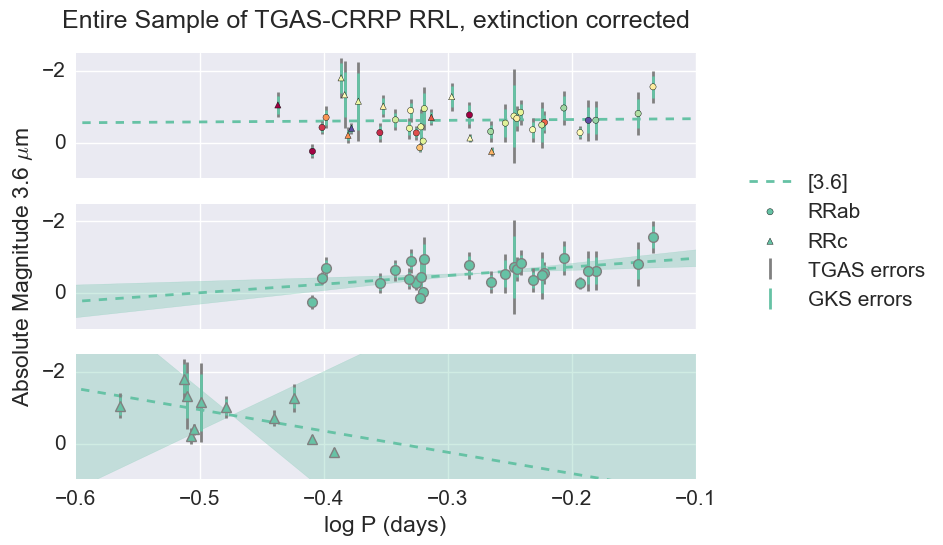

In [250]:
### Fit 3.6 in all variants

columns = ['slope', 'e_slope', 'zeropoint', 'e_zeropoint', 'mean_logp', 'source', 'type', 'band', 'sample', 'n_stars']

fit_df_final = pd.DataFrame(columns=columns)

p1 = np.arange(-1,0.1,0.1)

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)

palette = itertools.cycle(sns.color_palette())
from matplotlib import cm

## Whole sample, no cuts, RRc fundamentalised

popt, pcov = curve_fit(free_fit, analysis_df.logP_f, analysis_df.M_3p6)

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(analysis_df.logP_f), 'source': 'FreeFit', 'type': 'Fund', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(analysis_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(analysis_df.logP_f)

col = next(palette)

axp1 = mp.subplot(311)
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -6.0)

#axp1.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp1.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp1.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='TGAS errors')
axp1.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='GKS errors')
axp1.scatter(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_3p6'], c=analysis_df.ix[analysis_df.Type=='ab', '[Fe/H]'], cmap=cm.Spectral_r, marker='o', zorder=4, label='RRab')
axp1.scatter(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_3p6'], c=analysis_df.ix[analysis_df.Type=='c', '[Fe/H]'], cmap=cm.Spectral_r, marker='^', zorder=4, label='RRc')

xticklabels = axp1.get_xticklabels()
mp.setp(xticklabels, visible=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, -0.5))
axp1.set_yticks([0, -2, -4, -6])



## whole sample, no cuts, RRab only

axp2 = mp.subplot(312, sharex=axp1, sharey=axp1)

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, ab_df['log_P'],ab_df['M_3p6'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(ab_df['log_P']), 'source': 'FreeFit', 'type': 'ab', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(ab_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(ab_df['log_P'])

axp2.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp2.plot(p1, slope*(p1-mean)+ zp, ls='--', label="[3.6]", color=col)
axp2.errorbar(ab_df['log_P'], ab_df['M_3p6'], yerr = ab_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp2.errorbar(ab_df.log_P, ab_df.M_3p6, yerr = ab_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp2.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
mp.ylabel('Absolute Magnitude 3.6 $\mu$m')

xticklabels = axp2.get_xticklabels()
mp.setp(xticklabels, visible=False)
axp2.set_yticks([0, -2, -4, -6])

## whole sample, no cuts, RRc only

axp3 = mp.subplot(313, sharex=axp1, sharey=axp1)

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

popt, pcov = curve_fit(free_fit, c_df['log_P'],c_df['M_3p6'])

fit_df_final = fit_df_final.append({'slope': popt[0], 'e_slope': pcov[0][0], 'zeropoint': popt[1], 'e_zeropoint': pcov[1][1], 'mean_logp' : np.mean(c_df['log_P']), 'source': 'FreeFit', 'type': 'c', 'band': '3p6', 'sample' : 'complete', 'n_stars': len(c_df['M_3p6']!=np.nan)}, ignore_index=True)

slope = popt[0]
e_slope = pcov[0][0]
zp = popt[1]
e_zp = pcov[1][1]
mean = np.mean(c_df['log_P'])


axp3.fill_between(p1, ((slope+(2*e_slope))*(p1-mean) + zp - 2*e_zp), ((slope-(2*e_slope))*(p1-mean) + zp + 2*e_zp), alpha = 0.3, color=col)

axp3.plot(p1, slope*(p1-mean)+ zp, ls='--', label="_nolegend_", color=col)
axp3.errorbar(c_df['log_P'], c_df['M_3p6'], yerr = c_df.e_M_3p6_tgas, ls='None',zorder=4, color='Grey', label='_nolegend_')
axp3.errorbar(c_df.log_P, c_df.M_3p6, yerr = c_df.e_M_3p6_gks, ls='None',zorder=4, color=col, label='_nolegend_')
axp3.plot(c_df.log_P, c_df.M_3p6, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='_nolegend_')
axp3.set_yticks([0, -2, -4, -6])


mp.xlabel('log P (days)')
mp.suptitle('Entire Sample of TGAS-CRRP RRL, extinction corrected')
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.savefig('crrp_tgas_3p6um_ext_corr.pdf')

## Using metallicity as the extra parameter rather than 'scatter'

* Instead of having this extra nusince parameter 'scatter' in the MCMC model, can we use metallicity as the extra parameter?

In [251]:
## Repeat analysis for 3.6, using metallicity as an extra parameter?

x = ab_df.log_P
y = ab_df.M_3p6
z = ab_df['[Fe/H]']
dy = ab_df.e_M_3p6_gks

def log_prior(theta):
    if theta[3] <= 0 or np.any(np.abs(theta[:3]) > 1000):   ##### making limit on theta smaller so they're reasonable
        return -np.inf  # log(0)
    else:
        # Jeffreys Prior
        return -np.log(theta[3])
    
def log_likelihood(theta, x, y, z, dy):
    y_model = theta[0] + theta[1] * x + theta[2] * z
    S = dy ** 2 + theta[3] ** 2
    return -0.5 * np.sum(np.log(2 * np.pi * S) +
                         (y - y_model) ** 2 / S)

def log_posterior(theta, x, y, z, dy):
    return log_prior(theta) + log_likelihood(theta, x, y, z, dy)

ndim = 4  # number of parameters in the model
nwalkers = 100  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)
starting_guesses[:, 3] = np.random.rand(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=[x, y, z, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 300)

# Plot the four chains as above

fig, ax = mp.subplots(4, sharex=True)
for i in range(4):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
  

  
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

fig, ax = mp.subplots(4, sharex=True)
for i in range(4):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
    

# Use corner.py to visualize the three-dimensional posterior
corner.corner(sampler.flatchain, labels=['intercept', 'slope', 'metallicity', 'scatter']);

chain = sampler.flatchain

mp.clf()

fig = mp.figure(figsize=(6,6))

mp.errorbar(x, y, dy, ls='None', color='Grey');
im = mp.scatter(x, y, c=z, cmap=cm.Spectral, marker='o', s=50, zorder=4)

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]

xfit = np.arange(-1, 0, 0.1)
zfit = np.arange(-2.5, 0, 0.25)
for i in range(100):
    theta = thetas[i]
    mp.plot(xfit, theta[0] + theta[1] * xfit + theta[2]*zfit,
             color='black', alpha=0.05);
    
    
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.xlabel('log P (days)')
mp.ylabel('Absolute mag [3.6]')

theta_best = chain.mean(0)
theta_std = chain.std(0)

mp.plot(xfit, theta_best[0] + theta_best[1]*xfit + theta_best[2]*zfit, 'k--')

cbar_ax = fig.add_axes([0.95, 0.3, 0.05, 0.5])
cb = fig.colorbar(im, cax=cbar_ax, orientation='vertical', ticks=[-2.5, -2.0, -1.5, -1.0, -0.5, -0.0])
#im.set_clim(169.6,283.)
cb.set_label("[Fe/H]")

title_text = 'M$_{3.6}$ = ' + str(np.round(theta_best[1], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[1], decimals=3)) + ') $\log$ P + ' + str(np.round(theta_best[2], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[2], decimals=3)) + ') [Fe/H] ' + str(np.round(theta_best[0], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[0], decimals=3)) + ') , $\sigma_{int}$ = ' + str(np.round(theta_best[3], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[3], decimals=3)) + ')'

mp.suptitle(title_text)
mp.show()
print 'slope = ', theta_best[1], 'zeropoint = ', theta_best[0], 'metallicity = ', theta_best[2], 'scatter = ',  theta_best[3]

print 'standard deviations: ', theta_std[1], theta_std[0], theta_std[2], theta_std[3]

In [272]:
min(z), max(z)

(-2.4300000000000002, -0.070000000000000007)

In [297]:
title_text = 'M$_{3.6}$ = ' + str(np.round(theta_best[1], decimals=3)) + ' $\log$ P + ' + str(np.round(theta_best[2], decimals=3)) + ' [Fe/H] ' + str(np.round(theta_best[0], decimals=3)) + ', $\sigma_{int}$ = ' + str(np.round(theta_best[3], decimals=3))


In [298]:
title_text

'M$_{3.6}$ = -2.32 $\\log$ P + 0.019 [Fe/H] -1.116, $\\sigma_{int}$ = 0.297'

What about considering only those with the 'best' parallaxes? better than 10%

In [310]:
best_df = analysis_df.where((analysis_df.e_gks/analysis_df.Plx)<0.1).dropna(axis=0, how='all')

In [313]:
best_df = best_df.reset_index(drop=True)

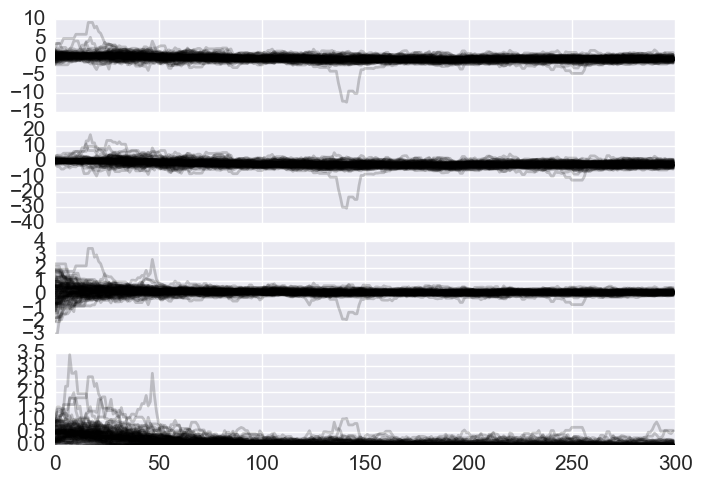

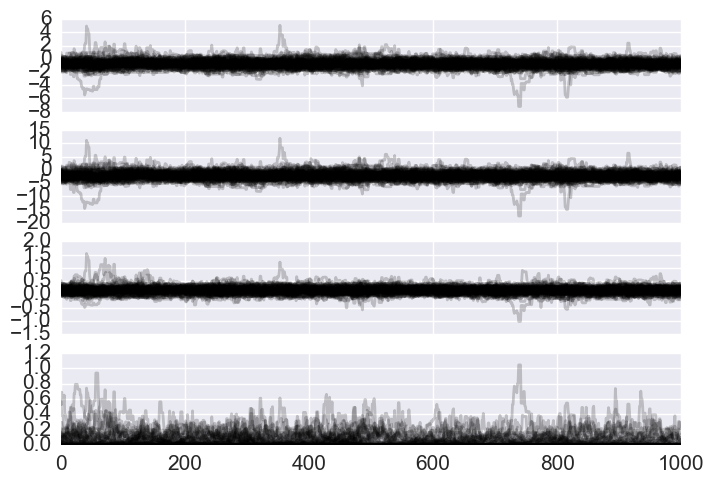

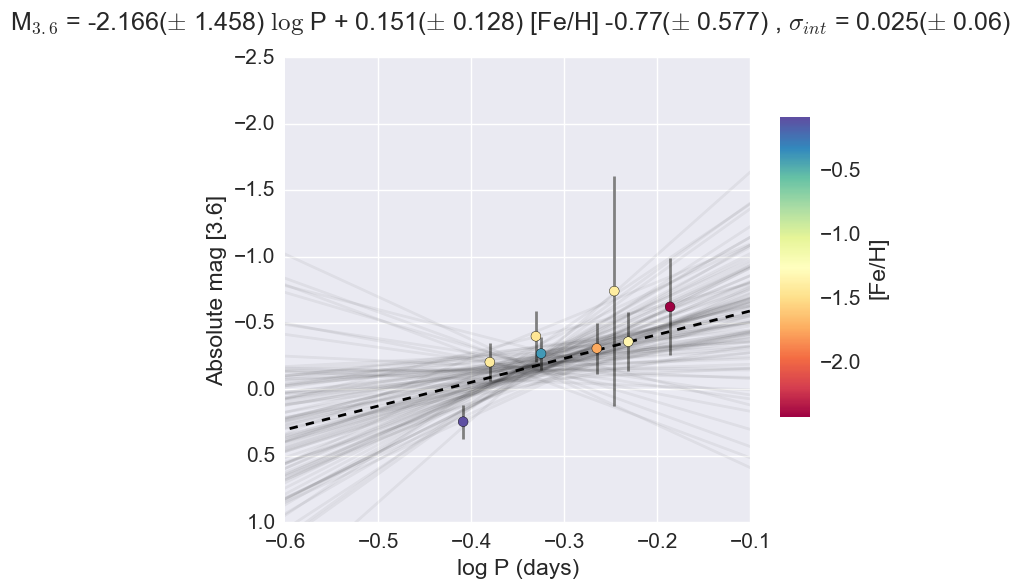

slope =  -2.16598908676 zeropoint =  -0.770403284417 metallicity =  0.150832401028 scatter =  0.0247014818513
standard deviations:  1.45824504722 0.577494015423 0.128440983574 0.0602533084948


In [314]:
## Repeat analysis for 3.6, using metallicity as an extra parameter?

x = best_df.logP_f
y = best_df.M_3p6
z = best_df['[Fe/H]']
dy = best_df.e_M_3p6_gks

def log_prior(theta):
    if theta[3] <= 0 or np.any(np.abs(theta[:3]) > 1000):   ##### making limit on theta smaller so they're reasonable
        return -np.inf  # log(0)
    else:
        # Jeffreys Prior
        return -np.log(theta[3])
    
def log_likelihood(theta, x, y, z, dy):
    y_model = theta[0] + theta[1] * x + theta[2] * z
    S = dy ** 2 + theta[3] ** 2
    return -0.5 * np.sum(np.log(2 * np.pi * S) +
                         (y - y_model) ** 2 / S)

def log_posterior(theta, x, y, z, dy):
    return log_prior(theta) + log_likelihood(theta, x, y, z, dy)

ndim = 4  # number of parameters in the model
nwalkers = 100  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)
starting_guesses[:, 3] = np.random.rand(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=[x, y, z, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 300)

# Plot the four chains as above

fig, ax = mp.subplots(4, sharex=True)
for i in range(4):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
  

  
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

fig, ax = mp.subplots(4, sharex=True)
for i in range(4):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
    

# Use corner.py to visualize the three-dimensional posterior
corner.corner(sampler.flatchain, labels=['intercept', 'slope', 'metallicity', 'scatter']);

chain = sampler.flatchain

mp.clf()

fig = mp.figure(figsize=(6,6))

mp.errorbar(x, y, dy, ls='None', color='Grey');
im = mp.scatter(x, y, c=z, cmap=cm.Spectral, marker='o', s=50, zorder=4)

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]

xfit = np.arange(-1, 0, 0.1)
zfit = np.arange(-2.5, 0, 0.25)
for i in range(100):
    theta = thetas[i]
    mp.plot(xfit, theta[0] + theta[1] * xfit + theta[2]*zfit,
             color='black', alpha=0.05);
    
    
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.xlabel('log P (days)')
mp.ylabel('Absolute mag [3.6]')

theta_best = chain.mean(0)
theta_std = chain.std(0)

mp.plot(xfit, theta_best[0] + theta_best[1]*xfit + theta_best[2]*zfit, 'k--')

cbar_ax = fig.add_axes([0.95, 0.3, 0.05, 0.5])
cb = fig.colorbar(im, cax=cbar_ax, orientation='vertical', ticks=[-2.5, -2.0, -1.5, -1.0, -0.5, -0.0])
#im.set_clim(169.6,283.)
cb.set_label("[Fe/H]")

title_text = 'M$_{3.6}$ = ' + str(np.round(theta_best[1], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[1], decimals=3)) + ') $\log$ P + ' + str(np.round(theta_best[2], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[2], decimals=3)) + ') [Fe/H] ' + str(np.round(theta_best[0], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[0], decimals=3)) + ') , $\sigma_{int}$ = ' + str(np.round(theta_best[3], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[3], decimals=3)) + ')'

mp.suptitle(title_text)
mp.show()
print 'slope = ', theta_best[1], 'zeropoint = ', theta_best[0], 'metallicity = ', theta_best[2], 'scatter = ',  theta_best[3]

print 'standard deviations: ', theta_std[1], theta_std[0], theta_std[2], theta_std[3]

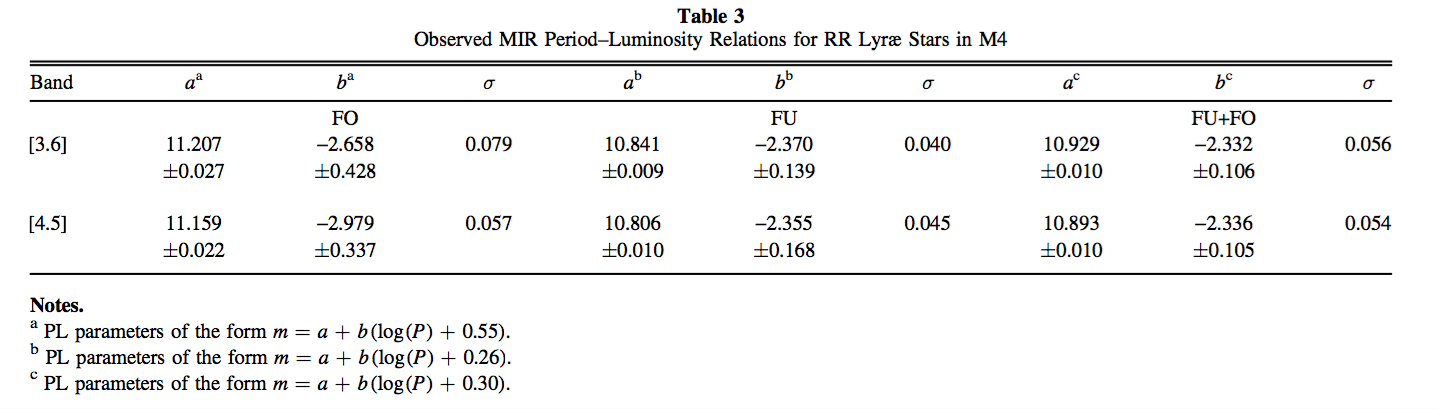

In [315]:
Image('neeley_m4_pls.png')

# Gaia sample isn't good enough at this point to measure the slope to good enough precision.

# Use the M4 slope instead


Going to use the M4 slopes, but still use the enire Gaia sample and the emcee procedure to try to get the best fit

In [316]:
## Repeat analysis for 3.6, using metallicity as an extra parameter?

x = ab_df.log_P
y = ab_df.M_3p6
z = ab_df['[Fe/H]']
dy = ab_df.e_M_3p6_gks

def log_prior(theta):
    if theta[2] <= 0 or np.any(np.abs(theta[:2]) > 1000):   ##### making limit on theta smaller so they're reasonable
        return -np.inf  # log(0)
    else:
        # Jeffreys Prior
        return -np.log(theta[2])
    
def log_likelihood(theta, x, y, z, dy):
    y_model = theta[0] + theta[1] * z - 2.370 * x 
    S = dy ** 2 + theta[2] ** 2
    return -0.5 * np.sum(np.log(2 * np.pi * S) +
                         (y - y_model) ** 2 / S)

def log_posterior(theta, x, y, z, dy):
    return log_prior(theta) + log_likelihood(theta, x, y, z, dy)

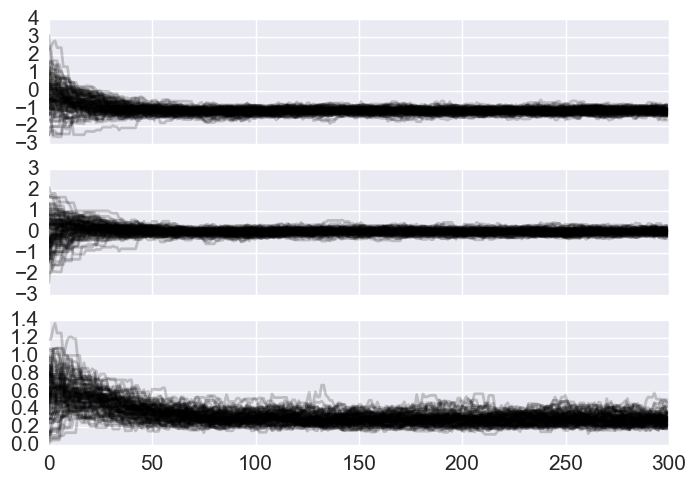

In [318]:
ndim = 3  # number of parameters in the model
nwalkers = 100  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)
starting_guesses[:, 2] = np.random.rand(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=[x, y, z, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 300)

# Plot the four chains as above

fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
  

In [320]:
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

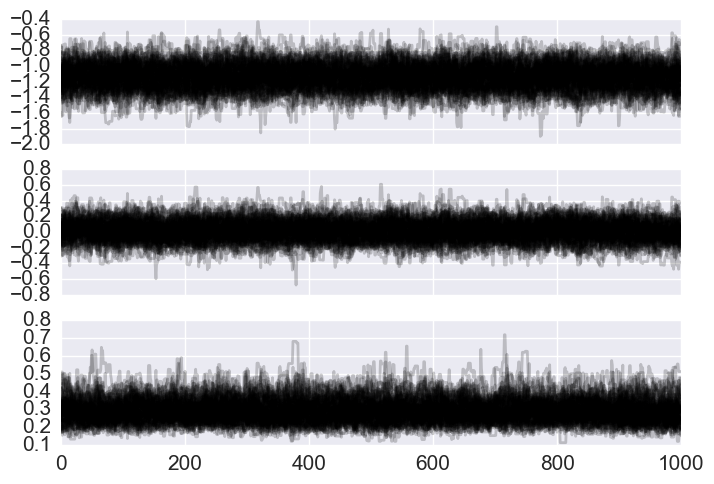

In [321]:
fig, ax = mp.subplots(3, sharex=True)
for i in range(3):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);

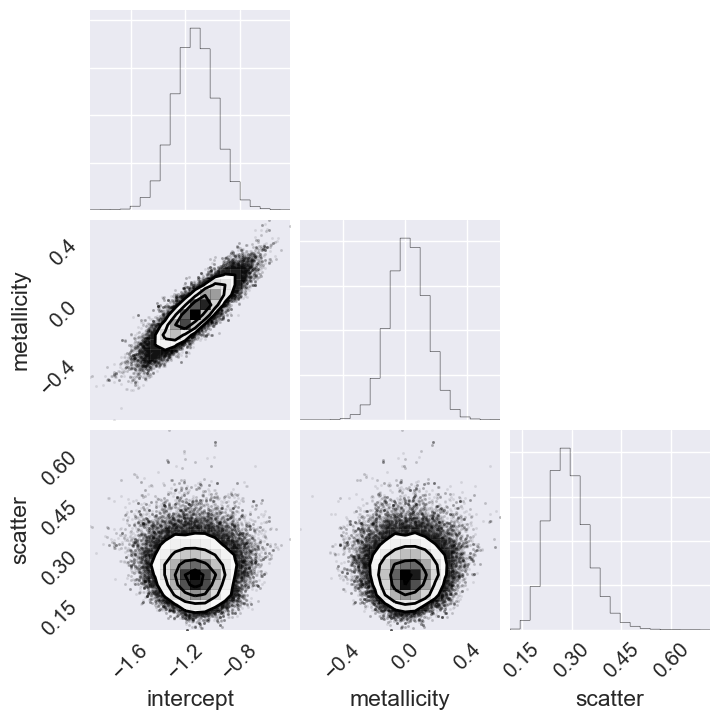

In [322]:
# Use corner.py to visualize the three-dimensional posterior
corner.corner(sampler.flatchain, labels=['intercept', 'metallicity', 'scatter']);

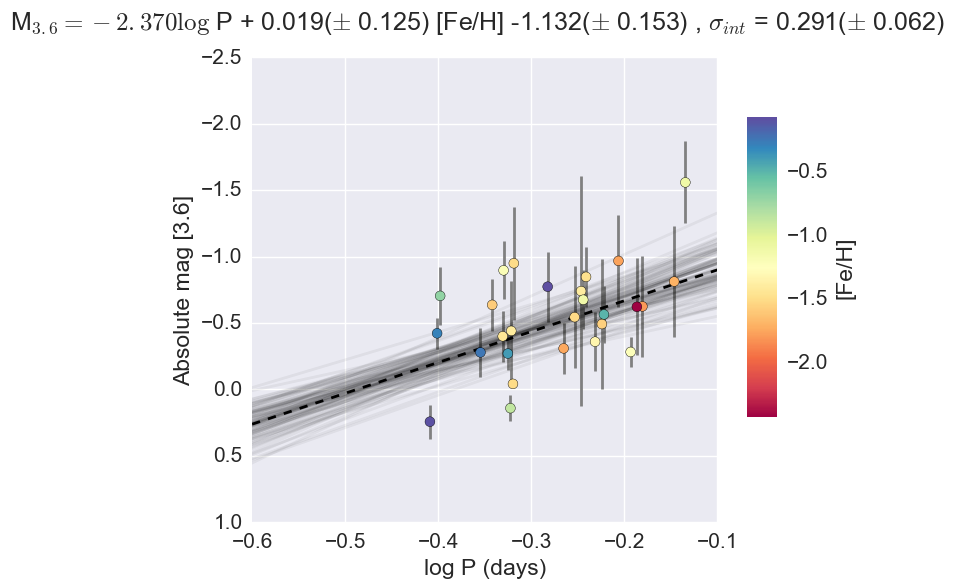

 zeropoint =  -1.13206511306 metallicity =  0.0194260718396 scatter =  0.290871542875
standard deviations:  0.153448486534 0.124519344249 0.0618105125167


In [326]:
chain = sampler.flatchain

mp.clf()

fig = mp.figure(figsize=(6,6))

mp.errorbar(x, y, dy, ls='None', color='Grey');
im = mp.scatter(x, y, c=z, cmap=cm.Spectral, marker='o', s=50, zorder=4)

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]

xfit = np.arange(-1, 0, 0.1)
zfit = np.arange(-2.5, 0, 0.25)
for i in range(100):
    theta = thetas[i]
    mp.plot(xfit, theta[0] -2.370 * xfit + theta[1]*zfit,
             color='black', alpha=0.05);
    
    
mp.xlim(-0.6, -0.1)
mp.ylim(1.0, -2.5)

mp.xlabel('log P (days)')
mp.ylabel('Absolute mag [3.6]')

theta_best = chain.mean(0)
theta_std = chain.std(0)

mp.plot(xfit, theta_best[0] -2.370*xfit + theta_best[1]*zfit, 'k--')

cbar_ax = fig.add_axes([0.95, 0.3, 0.05, 0.5])
cb = fig.colorbar(im, cax=cbar_ax, orientation='vertical', ticks=[-2.5, -2.0, -1.5, -1.0, -0.5, -0.0])
#im.set_clim(169.6,283.)
cb.set_label("[Fe/H]")

title_text = 'M$_{3.6} = -2.370 \log$ P + ' + str(np.round(theta_best[1], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[1], decimals=3)) + ') [Fe/H] ' + str(np.round(theta_best[0], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[0], decimals=3)) + ') , $\sigma_{int}$ = ' + str(np.round(theta_best[2], decimals=3)) + '($\pm$ ' + str(np.round(theta_std[2], decimals=3)) + ')'

mp.suptitle(title_text)
mp.show()
print 'zeropoint = ', theta_best[0], 'metallicity = ', theta_best[1], 'scatter = ',  theta_best[2]

print 'standard deviations: ', theta_std[0], theta_std[1], theta_std[2]

In [2]:
len(x)

NameError: name 'x' is not defined